In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df= pd.read_excel('C:/Users/nicky/Downloads/Company_Data2015-1.xlsx')

In [3]:
df.head()

Co_Code          Co_Name  Networth Next Year  Equity Paid Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital Employed  Total Debt  Gross Block   Net Working Capital   \
0          -1007.24     5936.03        474.30              -1076.34   
1           4458.20     7410.18       9070.86              -1098.88   
2           7714.68     6944.54       1281.54               4496.25   
3           2353.88     2326.05       1033.69              -2612.42   
4           4675.33     5740.90       1084.20               1836.23   

   Current Assets   ...  PBIDTM (%)[Latest]  PBITM (%)[Latest]  \
0            40.50  ...                0.00               0.00   
1           486.86  ...              -10.30             -39.74   
2          9097.64  ...            -5279.14           -5516.98   
3          1034.12  ...               -3.33              -7.21   
4          4685.81  ...             -295.55            -400.55   

   PBDTM (%)[Latest]  CPM (%)[Latest]  APATM (%)[Latest]  \
0               0.00             0.00               0.00   
1             -57.74           -57.74             -87.18   
2           -7780.25         -7723.67           -7961.51   
3             -48.13           -47.70             -51.58   
4            -845.88           379.79             274.79   

   Debtors Velocity (Days)  Creditors Velocity (Days)  \
0                        0                          0   
1                       29                        101   
2                       97                        558   
3                       93                         63   
4                     3887                        346   

   Inventory Velocity (Days)  Value of Output/Total Assets  \
0                       45.0                          0.00   
1                        2.0                          0.31   
2                        0.0                         -0.03   
3                        2.0                          0.24   
4                        0.0                          0.01   

   Value of Output/Gross Block  
0                         0.00  
1                         0.24  
2                        -0.26  
3                         1.90  
4                         0.05  

[5 rows x 67 columns]

In [4]:
print('The number of rows is',df.shape[0],'\n''The number of columns is',df.shape[1])

#default['default'] = default.apply (lambda row: 1 if (row['Networth Next Year'] <= 0) else 0, axis=1)

The number of rows is 3586 
The number of columns is 67


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth Next Year                   3586 non-null   float64
 3   Equity Paid Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital Employed                     3586 non-null   float64
 6   Total Debt                           3586 non-null   float64
 7   Gross Block                          3586 non-null   float64
 8   Net Working Capital                  3586 non-null   float64
 9   Current Assets                       3586 non-null   float64
 10  Current Liabilities and Provisions   3586 non-null   float64
 11  Total Assets/Liabilities      

In [6]:
# repalcing all special characters from column name
df.columns=df.columns.str.replace('[(,),%,\[,\],/, ,\.,\-]','')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Co_Code                          3586 non-null   int64  
 1   Co_Name                          3586 non-null   object 
 2   NetworthNextYear                 3586 non-null   float64
 3   EquityPaidUp                     3586 non-null   float64
 4   Networth                         3586 non-null   float64
 5   CapitalEmployed                  3586 non-null   float64
 6   TotalDebt                        3586 non-null   float64
 7   GrossBlock                       3586 non-null   float64
 8   NetWorkingCapital                3586 non-null   float64
 9   CurrentAssets                    3586 non-null   float64
 10  CurrentLiabilitiesandProvisions  3586 non-null   float64
 11  TotalAssetsLiabilities           3586 non-null   float64
 12  GrossSales          

In [8]:
# drpping co_code and co_name from dataframe
df.drop(['Co_Code','Co_Name'],axis=1,inplace=True)


In [9]:
df.head()

NetworthNextYear  EquityPaidUp  Networth  CapitalEmployed  TotalDebt  \
0          -8021.60        419.36  -7027.48         -1007.24    5936.03   
1          -3986.19       1954.93  -2968.08          4458.20    7410.18   
2          -3192.58         53.84    506.86          7714.68    6944.54   
3          -3054.51        157.30   -623.49          2353.88    2326.05   
4          -2967.36         50.30  -1070.83          4675.33    5740.90   

   GrossBlock  NetWorkingCapital  CurrentAssets  \
0      474.30           -1076.34          40.50   
1     9070.86           -1098.88         486.86   
2     1281.54            4496.25        9097.64   
3     1033.69           -2612.42        1034.12   
4     1084.20            1836.23        4685.81   

   CurrentLiabilitiesandProvisions  TotalAssetsLiabilities  ...  PBIDTMLatest  \
0                          1116.85                  109.60  ...          0.00   
1                          1585.74                 6043.94  ...        -10.30   
2                          4601.39                12316.07  ...      -5279.14   
3                          3646.54                 6000.42  ...         -3.33   
4                          2849.58                 7524.91  ...       -295.55   

   PBITMLatest  PBDTMLatest  CPMLatest  APATMLatest  DebtorsVelocityDays  \
0         0.00         0.00       0.00         0.00                    0   
1       -39.74       -57.74     -57.74       -87.18                   29   
2     -5516.98     -7780.25   -7723.67     -7961.51                   97   
3        -7.21       -48.13     -47.70       -51.58                   93   
4      -400.55      -845.88     379.79       274.79                 3887   

   CreditorsVelocityDays  InventoryVelocityDays  ValueofOutputTotalAssets  \
0                      0                   45.0                      0.00   
1                    101                    2.0                      0.31   
2                    558                    0.0                     -0.03   
3                     63                    2.0                      0.24   
4                    346                    0.0                      0.01   

   ValueofOutputGrossBlock  
0                     0.00  
1                     0.24  
2                    -0.26  
3                     1.90  
4                     0.05  

[5 rows x 65 columns]

# Question 1- Outlier treatment

<ipython-input-10-a040aa061202>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,5))
<ipython-input-10-a040aa061202>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,5))
<ipython-input-10-a040aa061202>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `fig

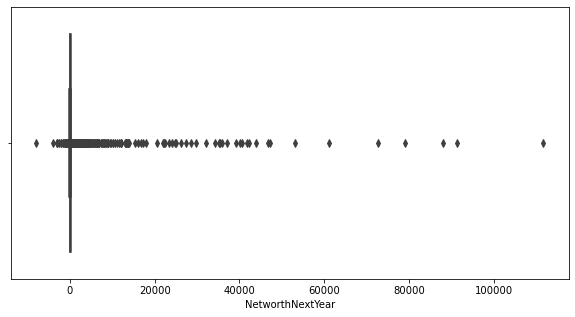

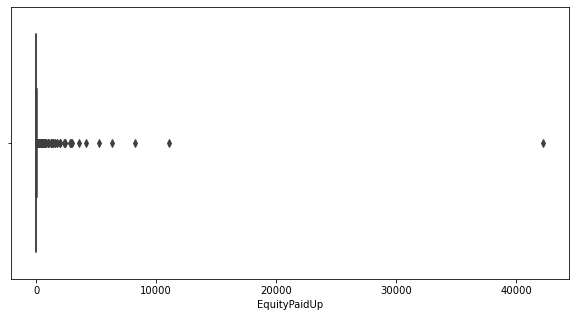

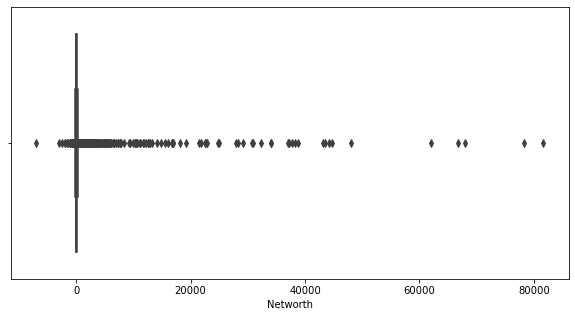

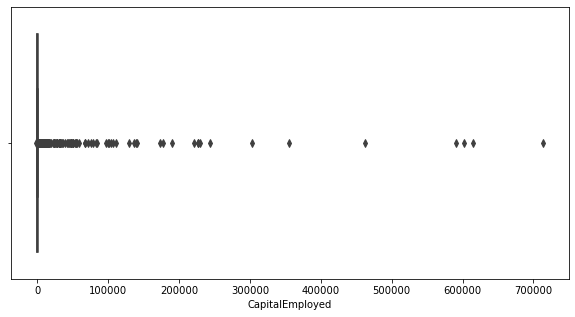

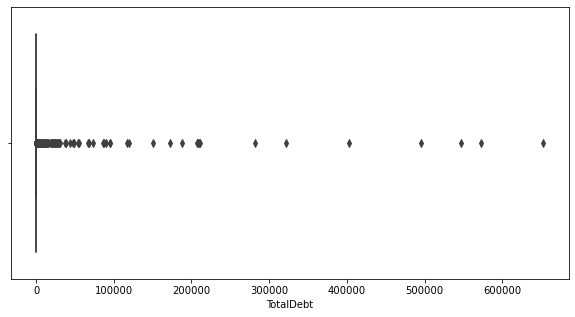

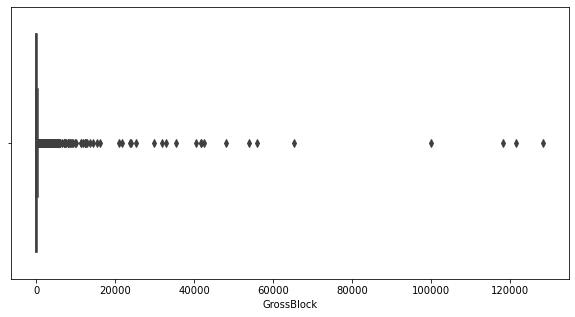

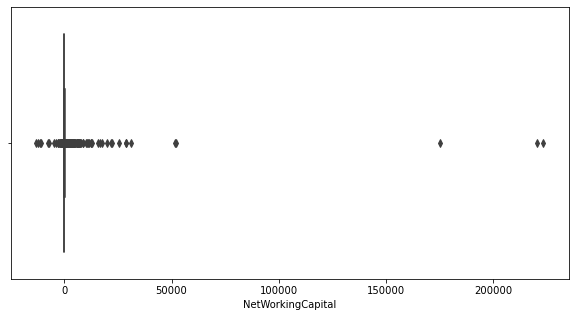

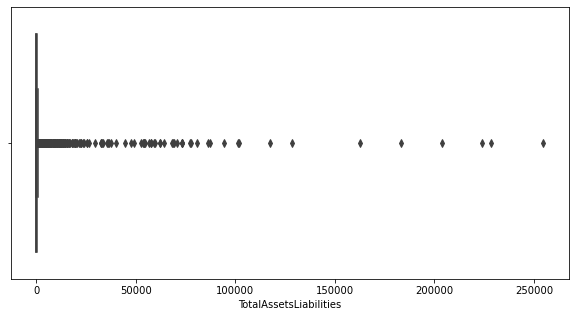

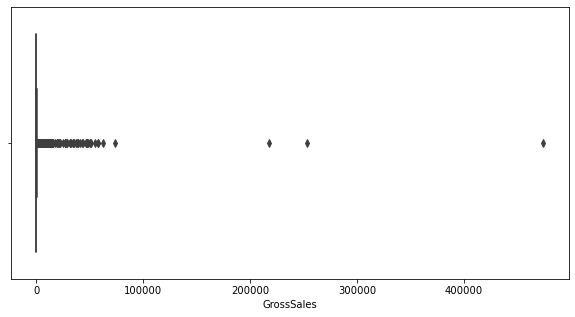

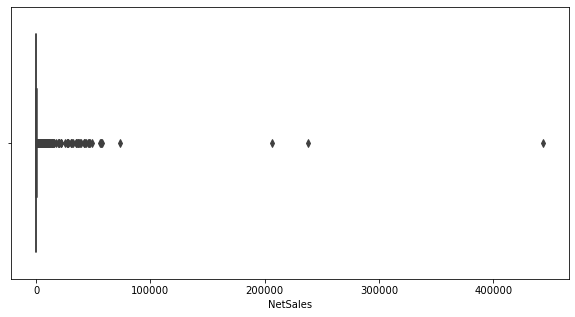

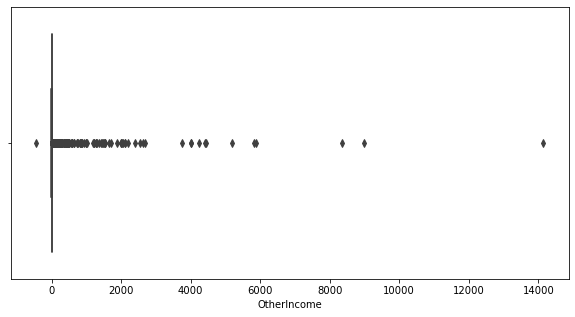

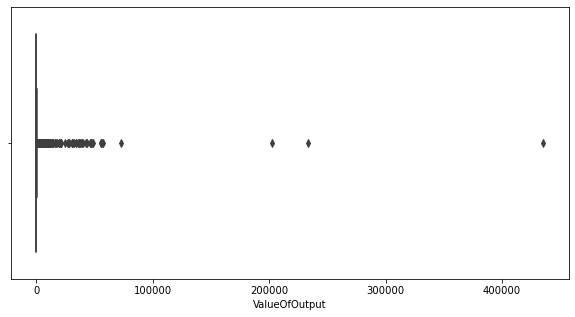

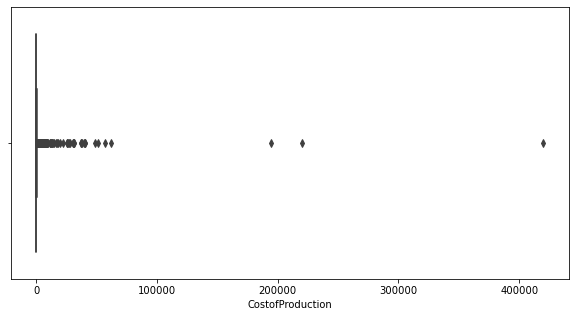

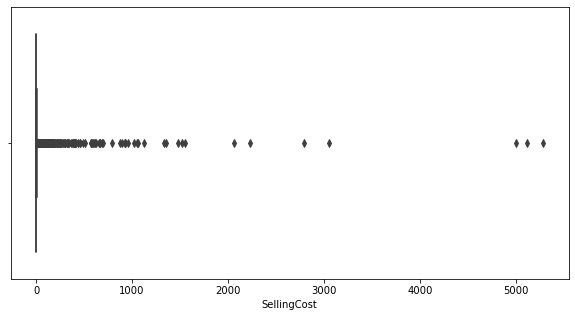

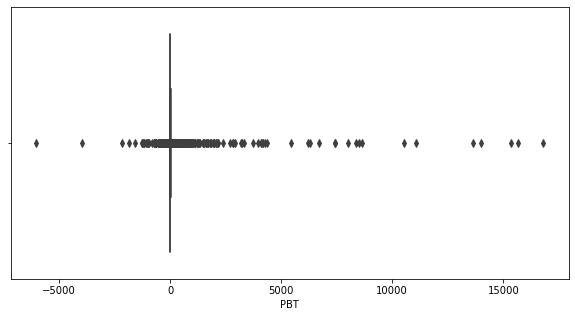

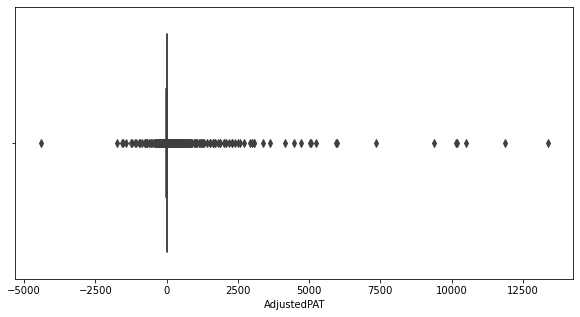

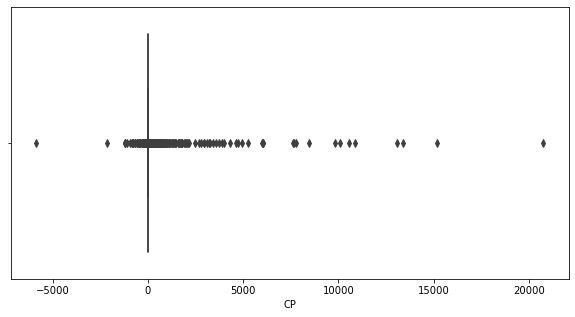

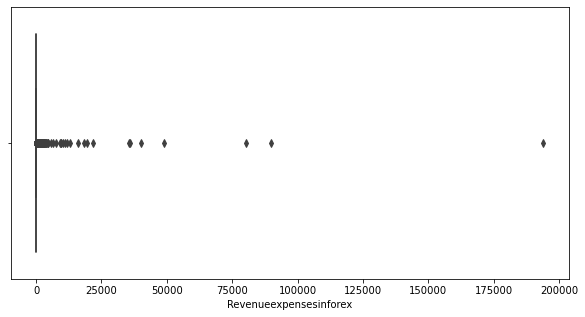

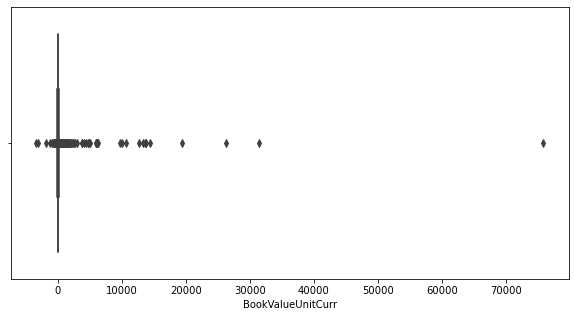

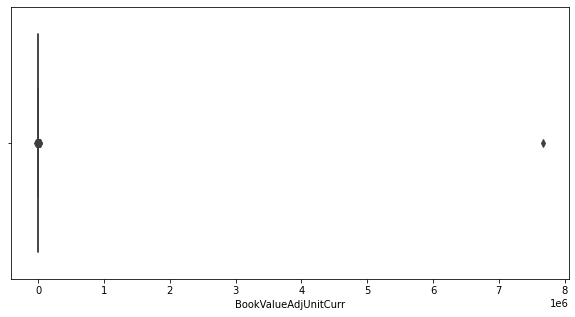

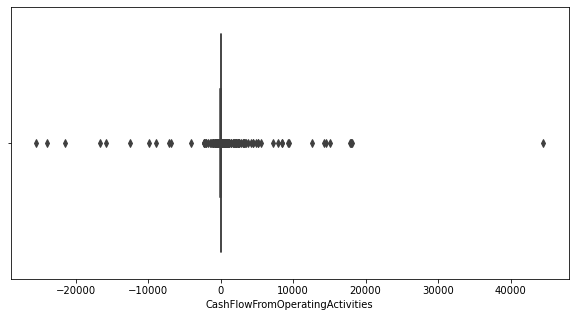

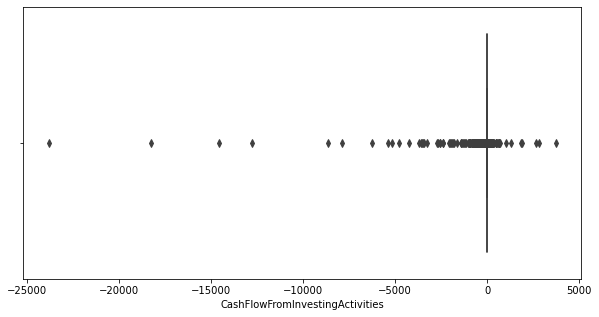

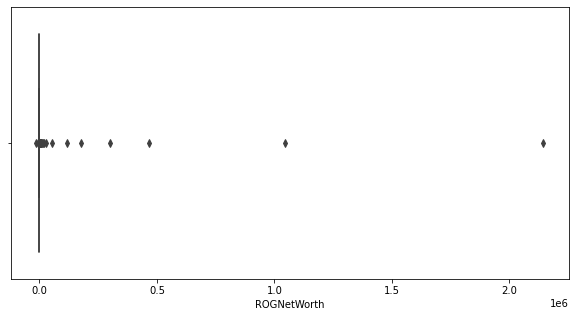

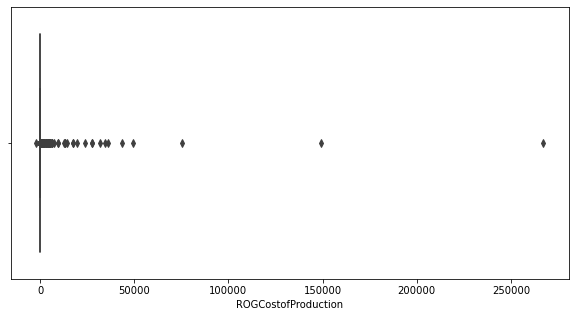

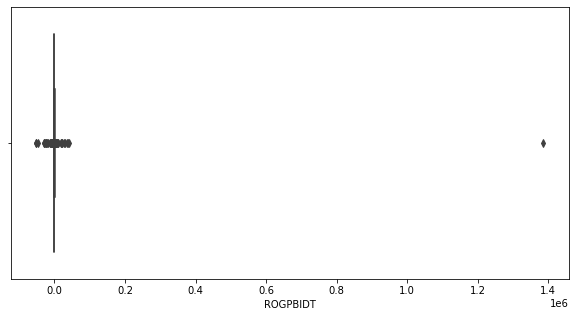

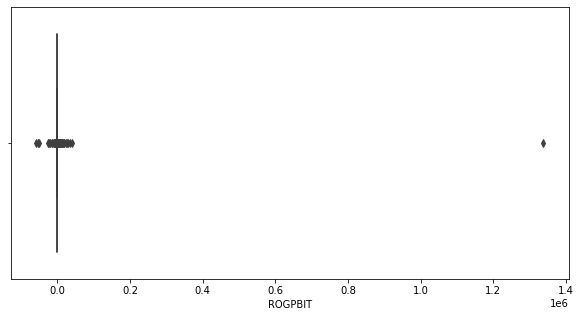

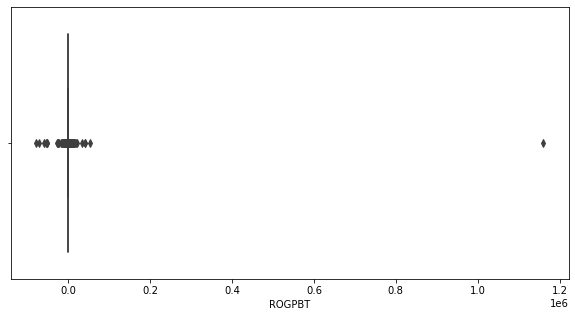

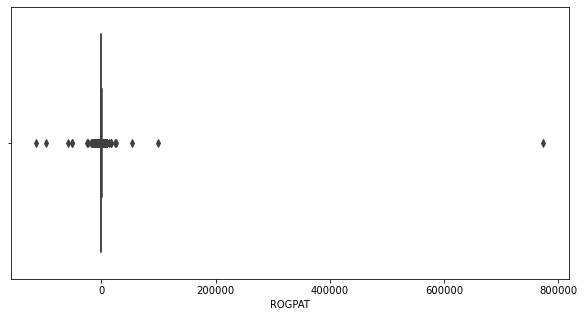

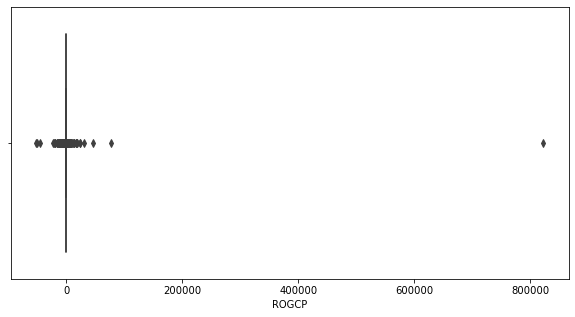

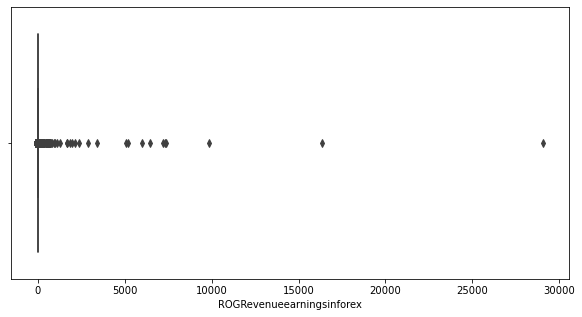

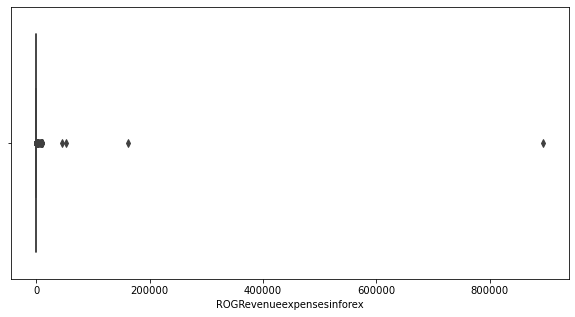

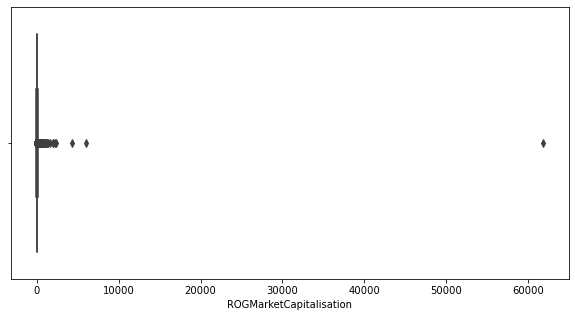

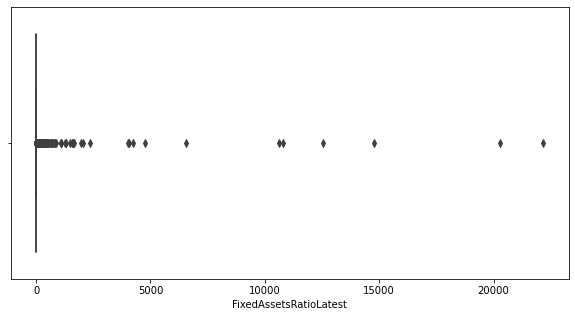

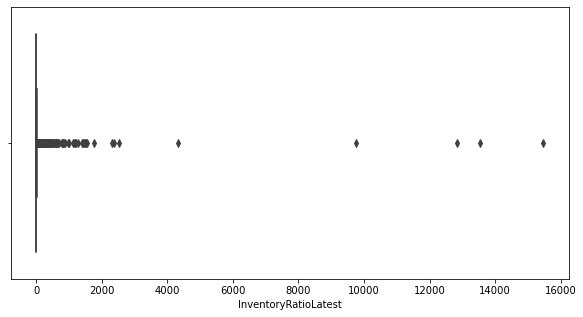

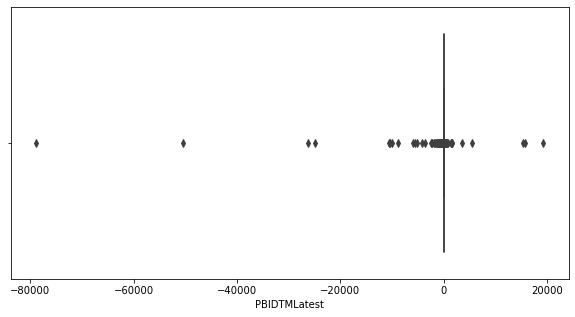

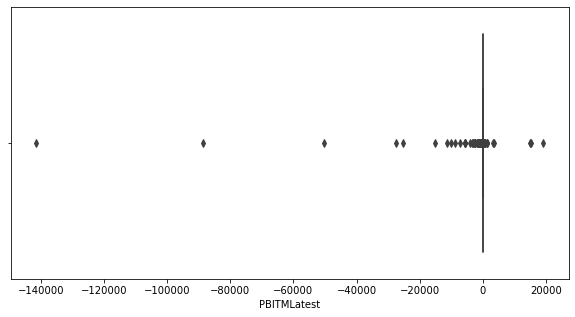

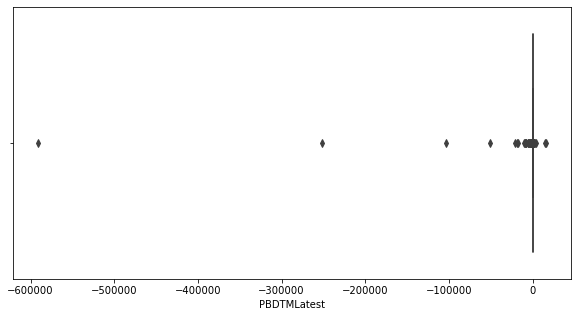

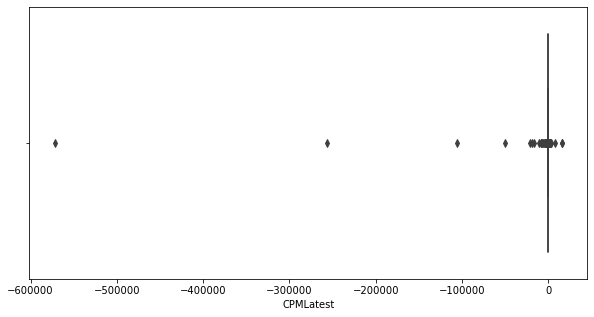

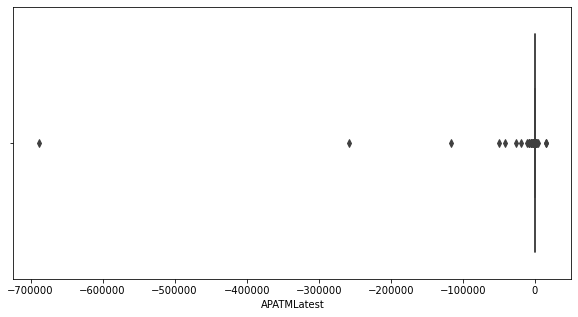

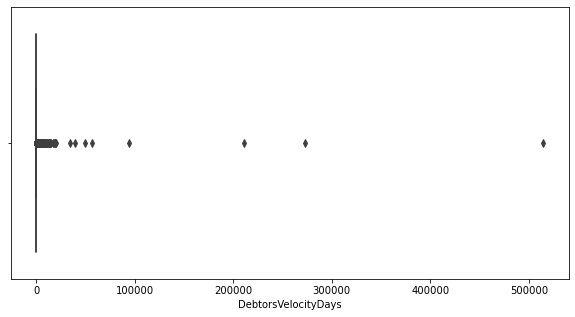

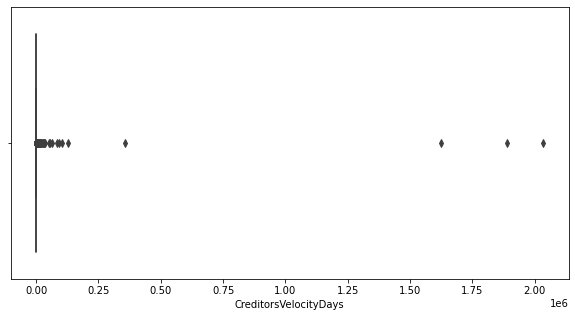

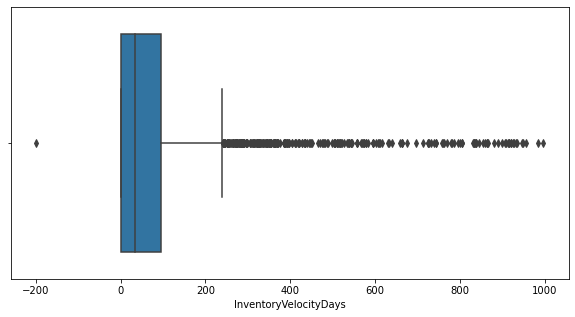

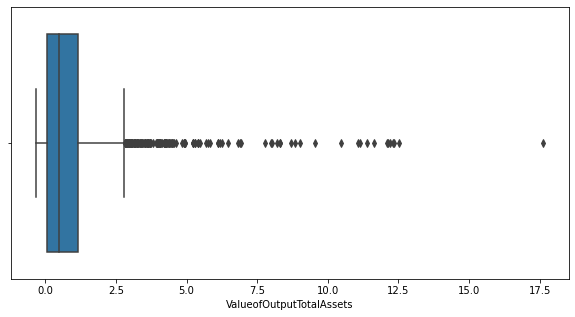

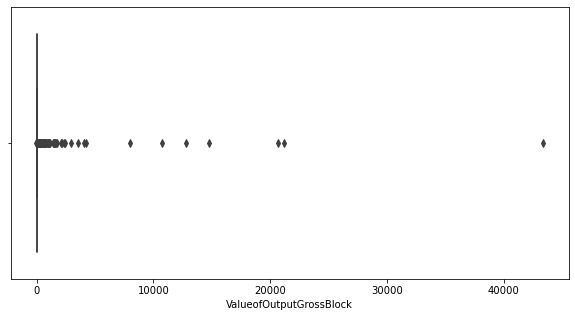

In [10]:
# Checking for outliers
for cols in df.columns:
    fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,5))
    sns.boxplot(df[cols])

In [11]:
# writing function for UR and LR of IQR
def detect_outliers(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [12]:
for column in df.columns:
    lr,ur=detect_outliers(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])


<ipython-input-13-311b93817dd0>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,5))
<ipython-input-13-311b93817dd0>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,5))
<ipython-input-13-311b93817dd0>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `fig

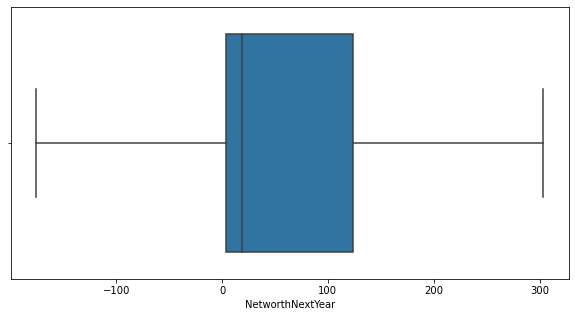

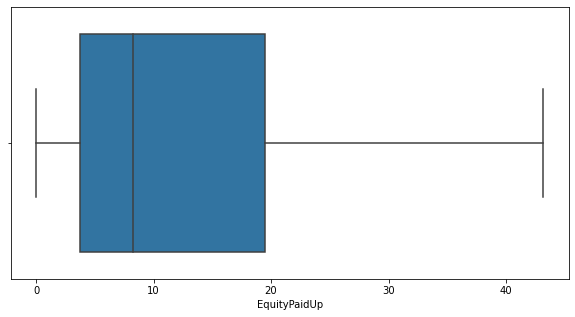

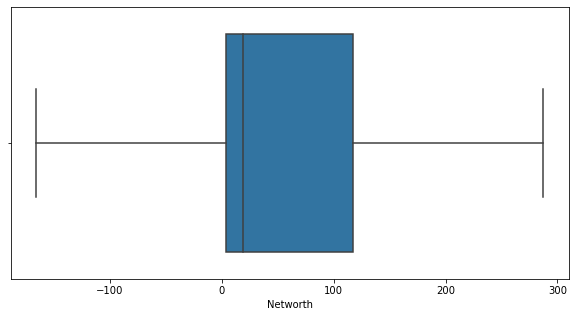

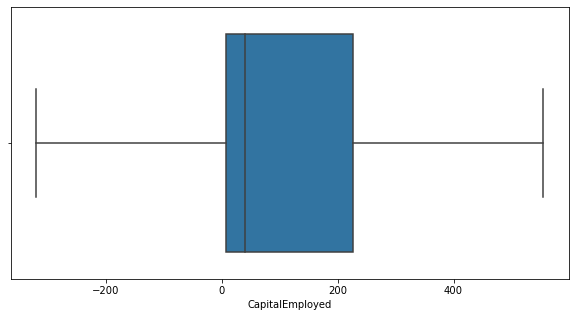

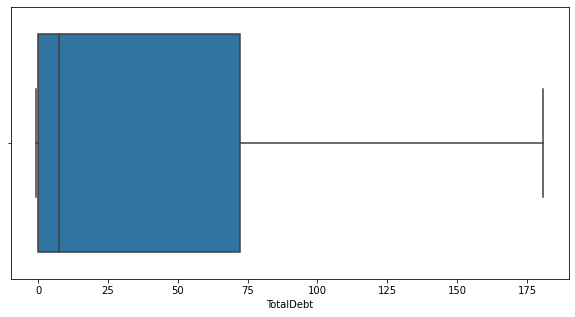

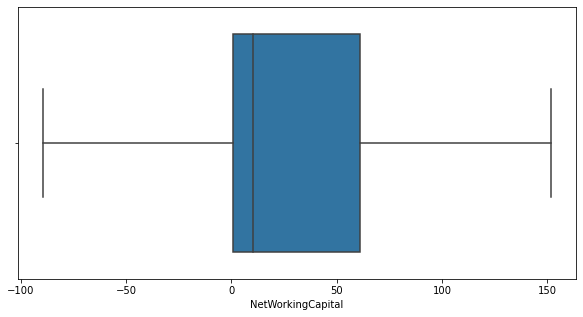

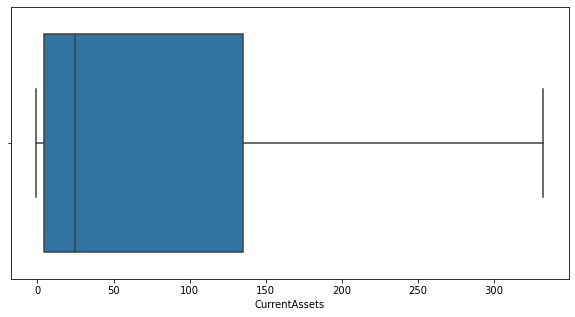

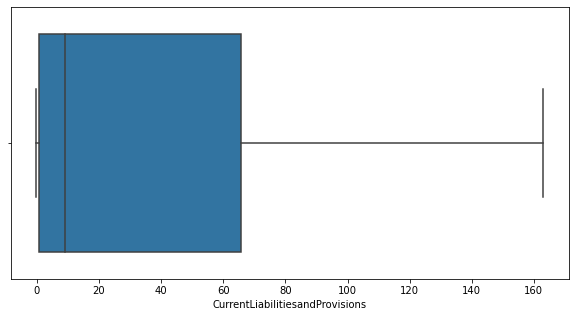

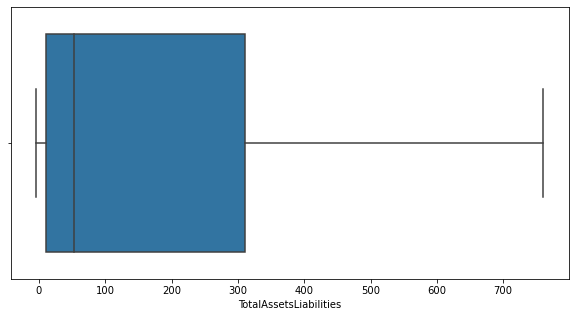

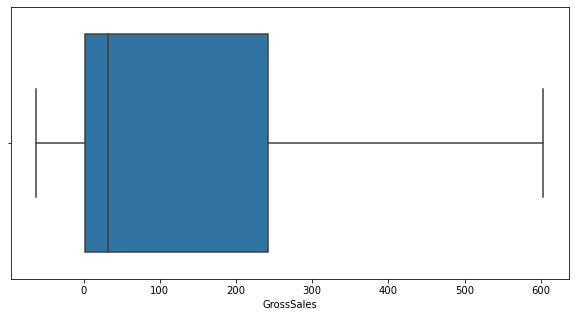

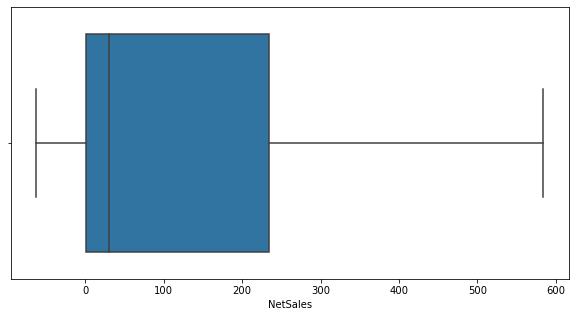

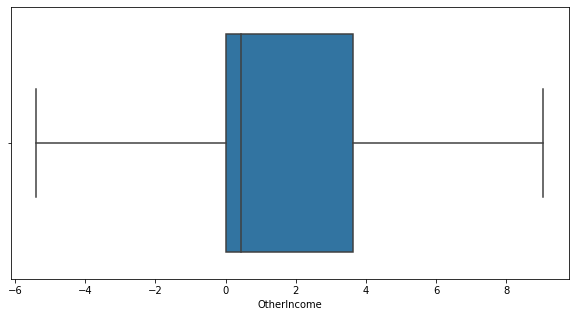

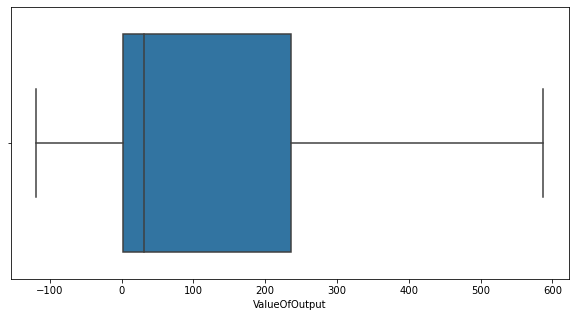

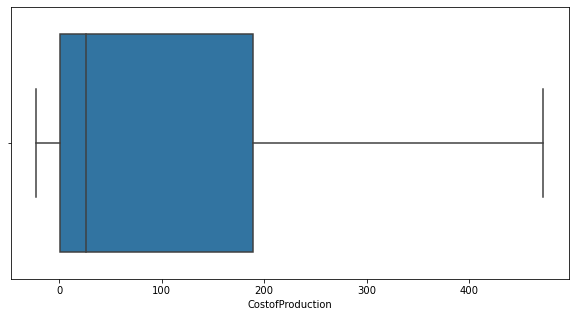

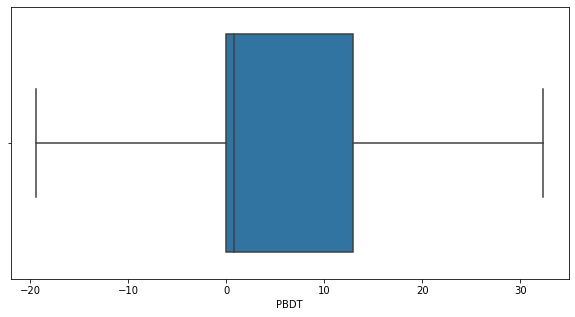

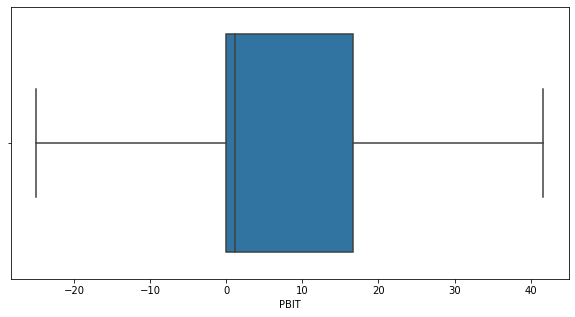

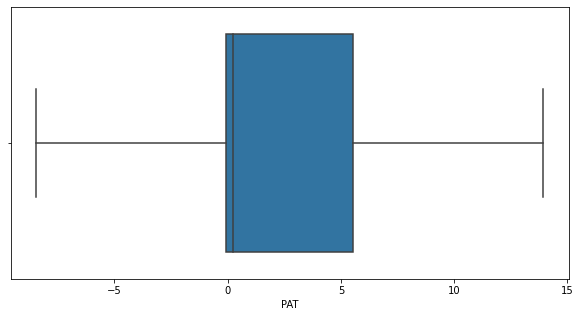

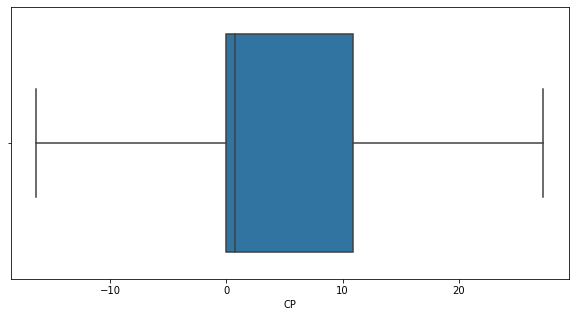

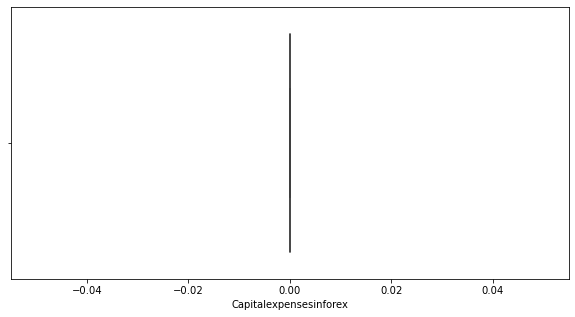

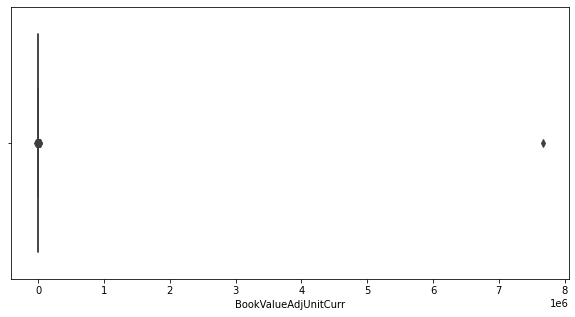

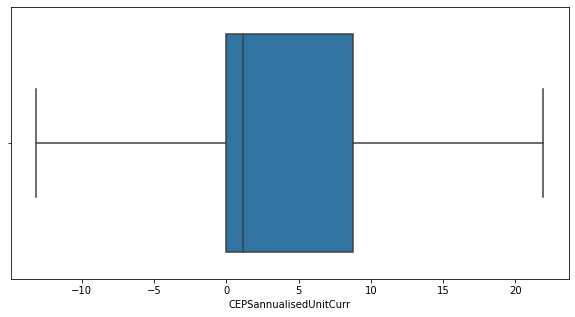

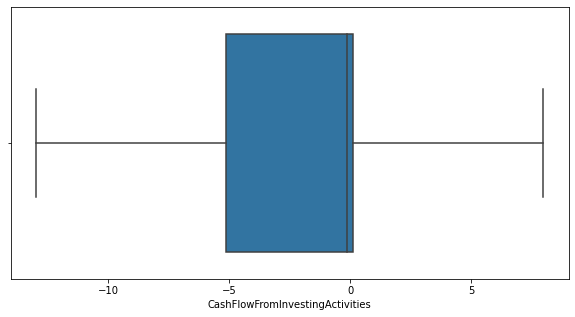

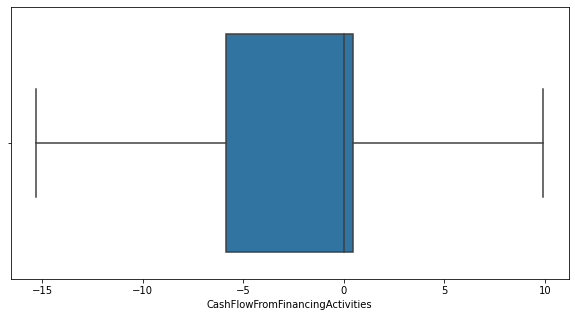

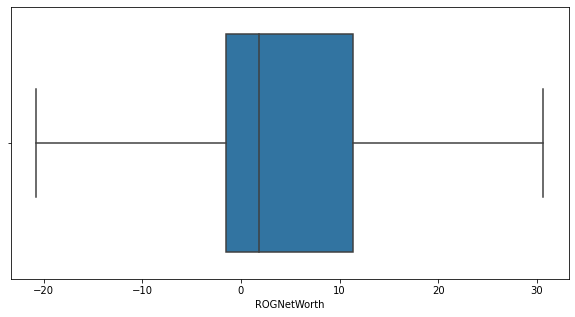

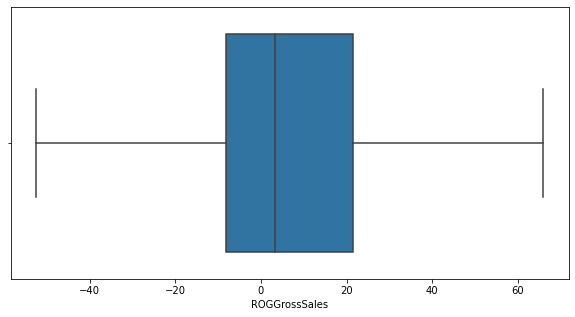

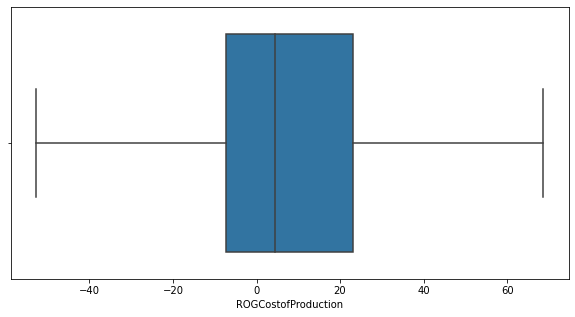

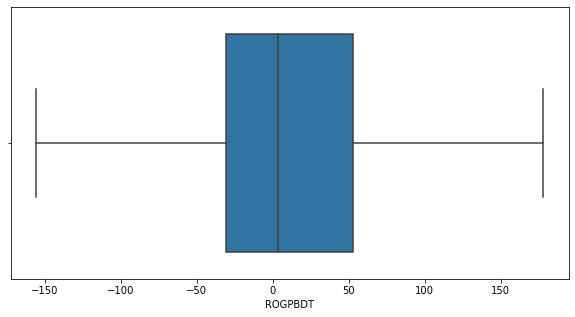

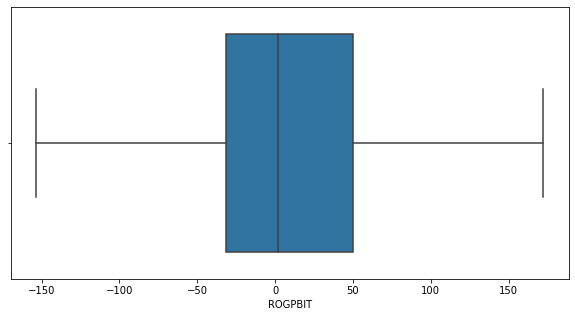

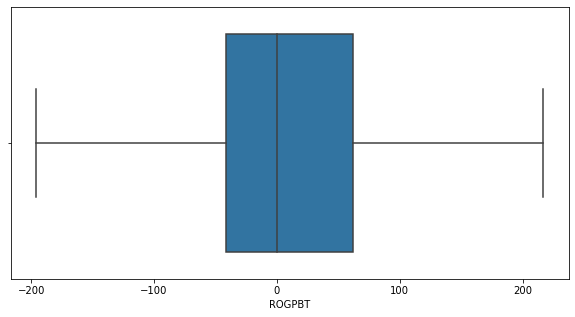

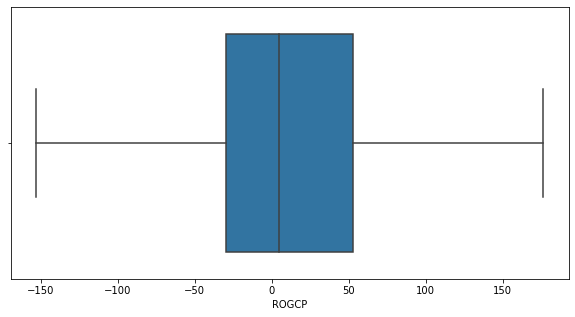

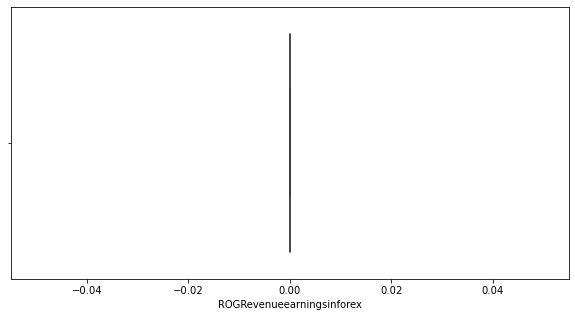

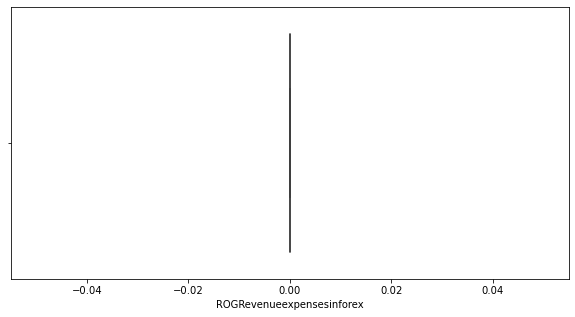

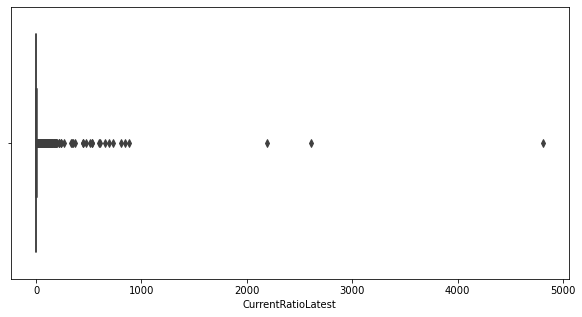

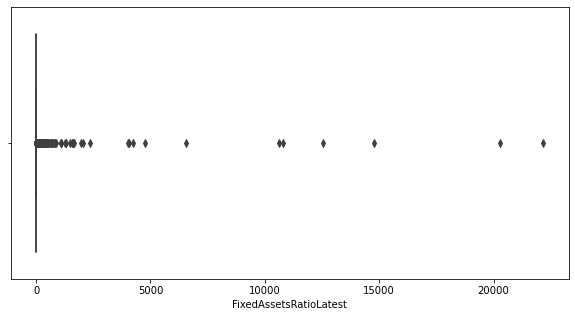

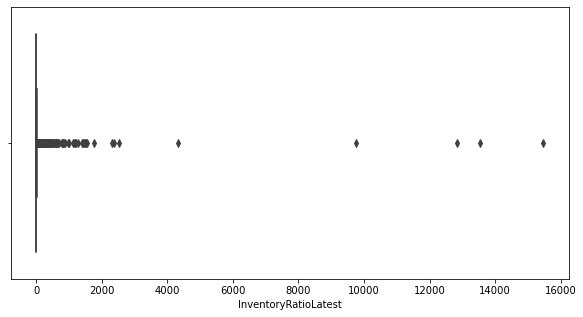

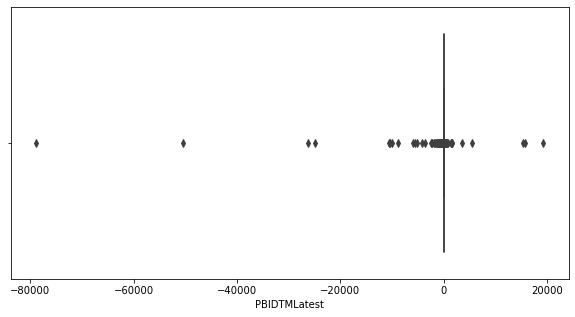

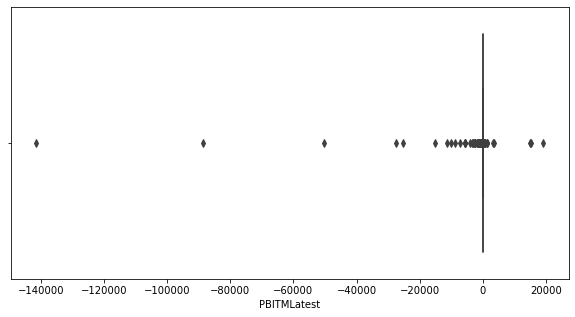

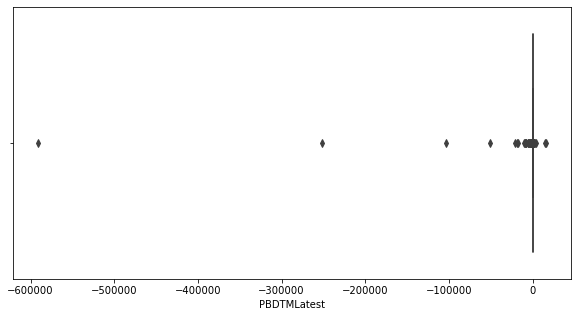

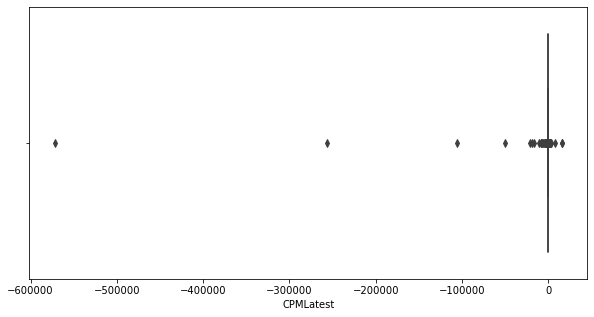

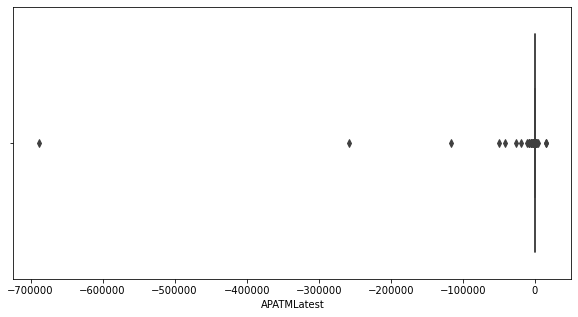

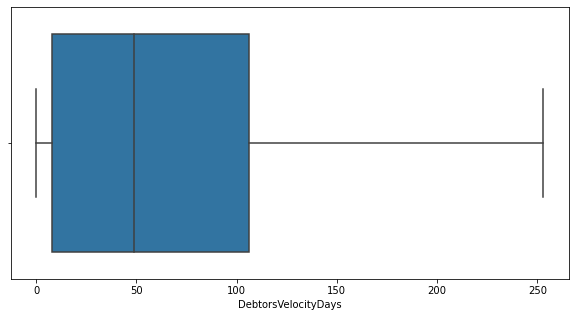

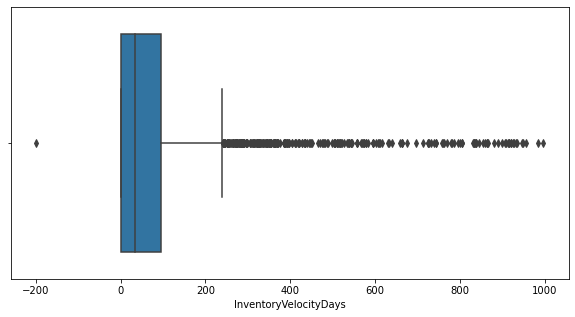

In [13]:
for cols in df.columns:
    fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,5))
    sns.boxplot(df[cols])

# Question 2 - Missing value treatment

In [14]:
# checking for missing values
df.isnull().sum()

NetworthNextYear              0
EquityPaidUp                  0
Networth                      0
CapitalEmployed               0
TotalDebt                     0
                           ... 
DebtorsVelocityDays           0
CreditorsVelocityDays         0
InventoryVelocityDays       103
ValueofOutputTotalAssets      0
ValueofOutputGrossBlock       0
Length: 65, dtype: int64

In [15]:
# Dropping all missing values
df=df.dropna()

In [16]:
df.head()

NetworthNextYear  EquityPaidUp  Networth  CapitalEmployed  TotalDebt  \
0        -175.74125      43.16875  -166.215       -320.90125     180.83   
1        -175.74125      43.16875  -166.215        555.10875     180.83   
2        -175.74125      43.16875   287.405        555.10875     180.83   
3        -175.74125      43.16875  -166.215        555.10875     180.83   
4        -175.74125      43.16875  -166.215        555.10875     180.83   

   GrossBlock  NetWorkingCapital  CurrentAssets  \
0    328.8825          -89.40625       40.50000   
1    328.8825          -89.40625      332.19375   
2    328.8825          151.52375      332.19375   
3    328.8825          -89.40625      332.19375   
4    328.8825          151.52375      332.19375   

   CurrentLiabilitiesandProvisions  TotalAssetsLiabilities  ...  PBIDTMLatest  \
0                        163.02625                109.6000  ...          0.00   
1                        163.02625                760.5175  ...        -10.30   
2                        163.02625                760.5175  ...      -5279.14   
3                        163.02625                760.5175  ...         -3.33   
4                        163.02625                760.5175  ...       -295.55   

   PBITMLatest  PBDTMLatest  CPMLatest  APATMLatest  DebtorsVelocityDays  \
0         0.00         0.00       0.00         0.00                  0.0   
1       -39.74       -57.74     -57.74       -87.18                 29.0   
2     -5516.98     -7780.25   -7723.67     -7961.51                 97.0   
3        -7.21       -48.13     -47.70       -51.58                 93.0   
4      -400.55      -845.88     379.79       274.79                253.0   

   CreditorsVelocityDays  InventoryVelocityDays  ValueofOutputTotalAssets  \
0                    0.0                   45.0                      0.00   
1                  101.0                    2.0                      0.31   
2                  210.5                    0.0                     -0.03   
3                   63.0                    2.0                      0.24   
4                  210.5                    0.0                      0.01   

   ValueofOutputGrossBlock  
0                     0.00  
1                     0.24  
2                    -0.26  
3                     1.90  
4                     0.05  

[5 rows x 65 columns]

In [17]:
df.isnull().sum()

NetworthNextYear            0
EquityPaidUp                0
Networth                    0
CapitalEmployed             0
TotalDebt                   0
                           ..
DebtorsVelocityDays         0
CreditorsVelocityDays       0
InventoryVelocityDays       0
ValueofOutputTotalAssets    0
ValueofOutputGrossBlock     0
Length: 65, dtype: int64

# Question 3- Transform target variable into 0 and 1

In [18]:
df['default'] = df.apply (lambda row: 1 if (row['NetworthNextYear'] <= 0) else 0, axis=1)

In [19]:
df.head()

NetworthNextYear  EquityPaidUp  Networth  CapitalEmployed  TotalDebt  \
0        -175.74125      43.16875  -166.215       -320.90125     180.83   
1        -175.74125      43.16875  -166.215        555.10875     180.83   
2        -175.74125      43.16875   287.405        555.10875     180.83   
3        -175.74125      43.16875  -166.215        555.10875     180.83   
4        -175.74125      43.16875  -166.215        555.10875     180.83   

   GrossBlock  NetWorkingCapital  CurrentAssets  \
0    328.8825          -89.40625       40.50000   
1    328.8825          -89.40625      332.19375   
2    328.8825          151.52375      332.19375   
3    328.8825          -89.40625      332.19375   
4    328.8825          151.52375      332.19375   

   CurrentLiabilitiesandProvisions  TotalAssetsLiabilities  ...  PBITMLatest  \
0                        163.02625                109.6000  ...         0.00   
1                        163.02625                760.5175  ...       -39.74   
2                        163.02625                760.5175  ...     -5516.98   
3                        163.02625                760.5175  ...        -7.21   
4                        163.02625                760.5175  ...      -400.55   

   PBDTMLatest  CPMLatest  APATMLatest  DebtorsVelocityDays  \
0         0.00       0.00         0.00                  0.0   
1       -57.74     -57.74       -87.18                 29.0   
2     -7780.25   -7723.67     -7961.51                 97.0   
3       -48.13     -47.70       -51.58                 93.0   
4      -845.88     379.79       274.79                253.0   

   CreditorsVelocityDays  InventoryVelocityDays  ValueofOutputTotalAssets  \
0                    0.0                   45.0                      0.00   
1                  101.0                    2.0                      0.31   
2                  210.5                    0.0                     -0.03   
3                   63.0                    2.0                      0.24   
4                  210.5                    0.0                      0.01   

   ValueofOutputGrossBlock  default  
0                     0.00        1  
1                     0.24        1  
2                    -0.26        1  
3                     1.90        1  
4                     0.05        1  

[5 rows x 66 columns]

# Question 4 - Univariate and Bivariate  Analysis

In [20]:
# Univariate analysis
df.describe()

NetworthNextYear  EquityPaidUp     Networth  CapitalEmployed  \
count       3478.000000   3478.000000  3478.000000      3478.000000   
mean          76.198356     13.865643    72.683171       151.252851   
std          119.905250     13.922678   112.331517       207.163494   
min         -175.741250      0.000000  -166.215000      -320.901250   
25%            3.922500      3.732500     3.850000         7.602500   
50%           18.730000      8.190000    18.305000        38.430000   
75%          121.100000     19.232500   114.032500       223.020000   
max          303.528750     43.168750   287.405000       555.108750   

         TotalDebt   GrossBlock  NetWorkingCapital  CurrentAssets  \
count  3478.000000  3478.000000        3478.000000    3478.000000   
mean     47.533304    85.233785          36.793258      91.308047   
std      68.144510   121.261002          59.275579     121.925064   
min      -0.720000   -41.190000         -89.406250      -0.910000   
25%       0.040000     0.610000           1.000000       4.062500   
50%       7.710000    15.985000          10.275000      24.615000   
75%      73.087500   132.650000          61.150000     135.277500   
max     180.830000   328.882500         151.523750     332.193750   

       CurrentLiabilitiesandProvisions  TotalAssetsLiabilities  ...  \
count                      3478.000000             3478.000000  ...   
mean                         43.610743              207.237954  ...   
std                          60.993293              279.584263  ...   
min                          -0.230000               -4.510000  ...   
25%                           0.762500               10.585000  ...   
50%                           9.225000               51.590000  ...   
75%                          65.765000              305.752500  ...   
max                         163.026250              760.517500  ...   

         PBITMLatest    PBDTMLatest      CPMLatest    APATMLatest  \
count    3478.000000    3478.000000    3478.000000    3478.000000   
mean     -105.536176    -313.524991    -308.709779    -367.443358   
std      3094.191672   11085.468405   10836.215161   12687.778624   
min   -141600.000000 -590500.000000 -572000.000000 -688600.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         5.230000       4.670000       3.885000       1.585000   
75%        14.087500      13.840000      11.237500       7.187500   
max     19195.700000   15640.000000   15640.000000   15266.670000   

       DebtorsVelocityDays  CreditorsVelocityDays  InventoryVelocityDays  \
count          3478.000000            3478.000000            3478.000000   
mean             75.381541              62.670788              79.632260   
std              81.558709              67.994895             137.879978   
min               0.000000               0.000000            -199.000000   
25%               8.000000               8.000000               0.000000   
50%              49.500000              39.000000              35.000000   
75%             106.000000              90.000000              96.000000   
max             253.000000             210.500000             996.000000   

       ValueofOutputTotalAssets  ValueofOutputGrossBlock      default  
count               3478.000000              3478.000000  3478.000000  
mean                   0.738486                 3.348249     0.108396  
std                    0.776428                 4.092201     0.310924  
min                   -0.330000                -6.690000     0.000000  
25%                    0.070000                 0.280000     0.000000  
50%                    0.495000                 1.530000     0.000000  
75%                    1.170000                 4.857500     0.000000  
max                    2.795000                11.870000     1.000000  

[8 rows x 66 columns]

<ipython-input-21-0671edf1c082>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,5))
<ipython-input-21-0671edf1c082>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,5))
<ipython-input-21-0671edf1c082>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `fig

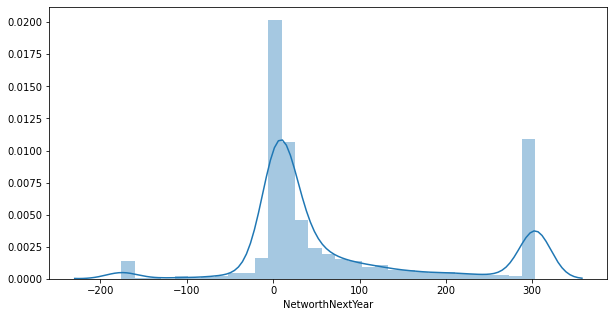

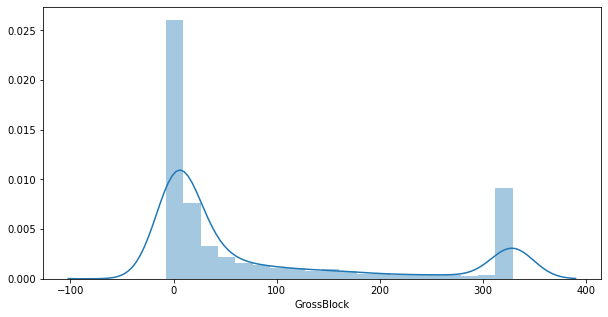

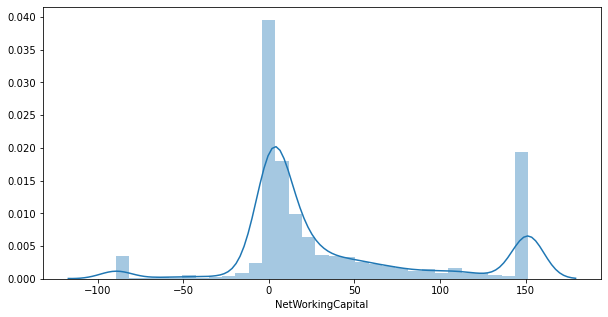

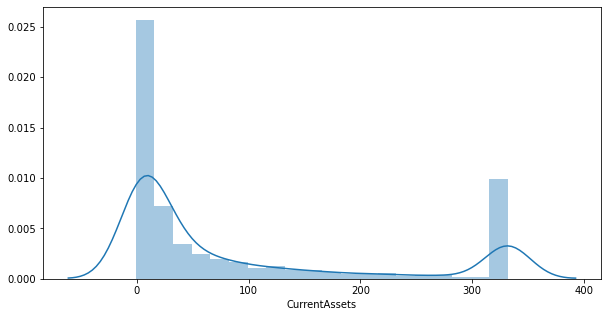

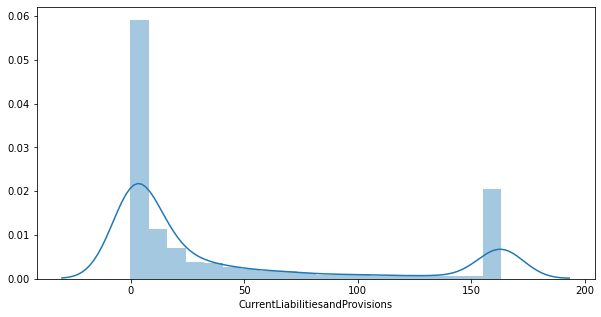

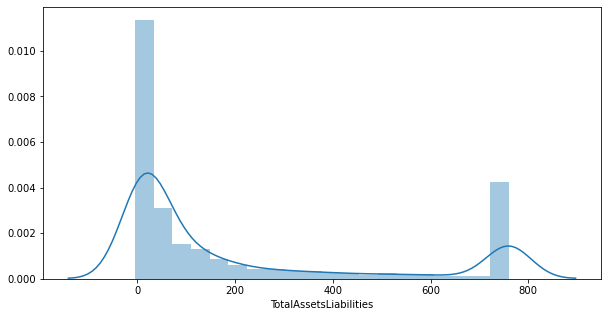

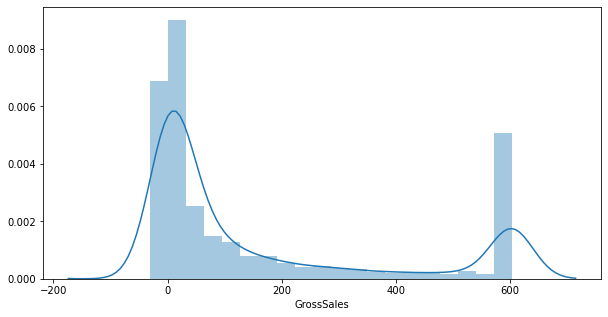

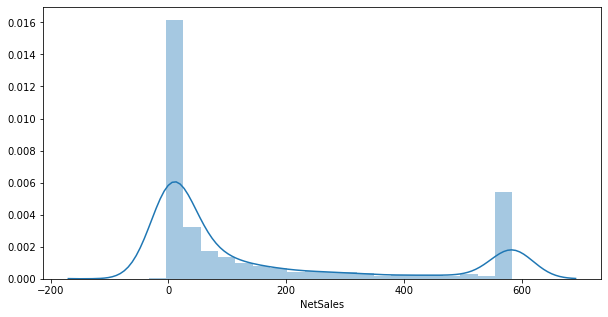

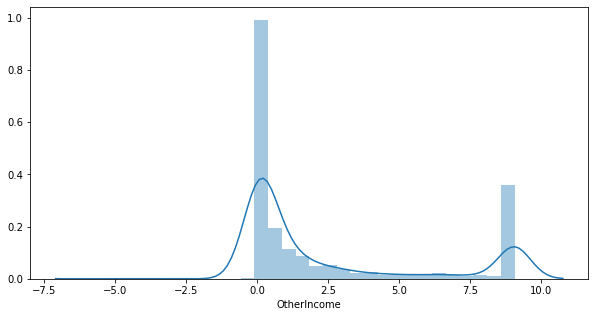

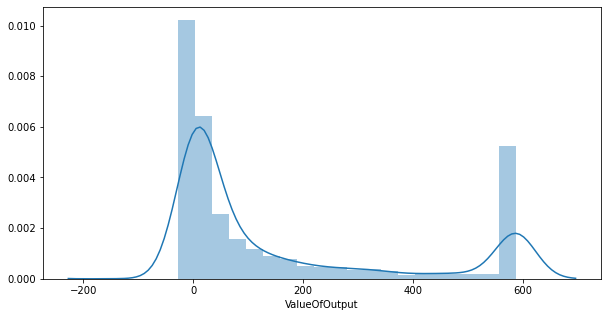

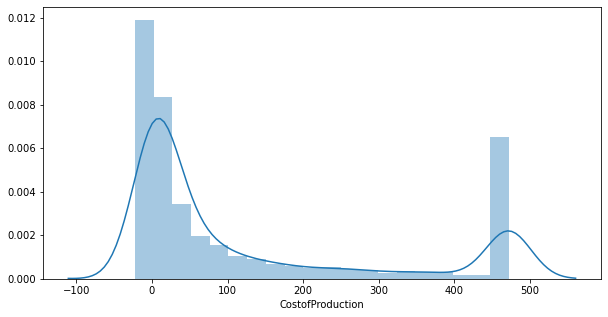

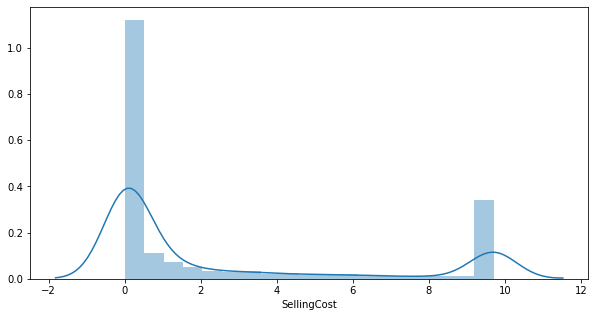

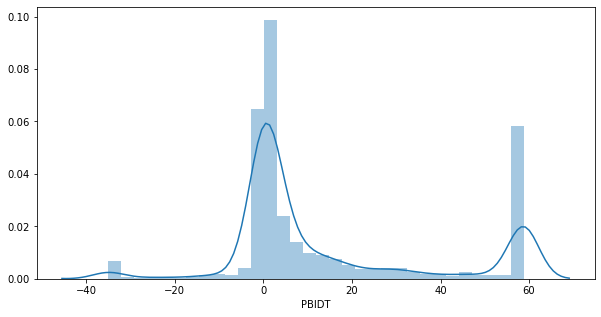

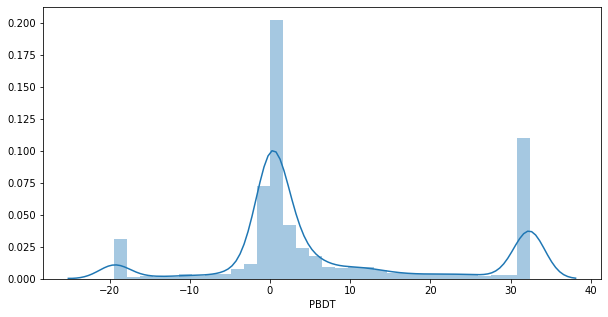

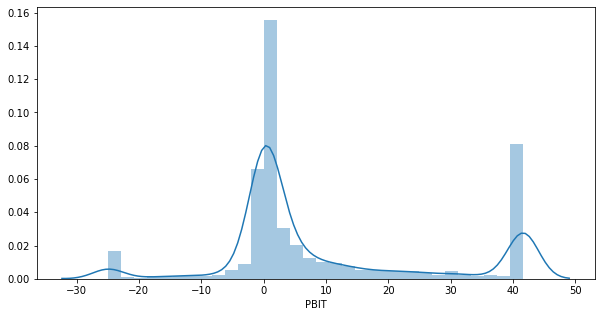

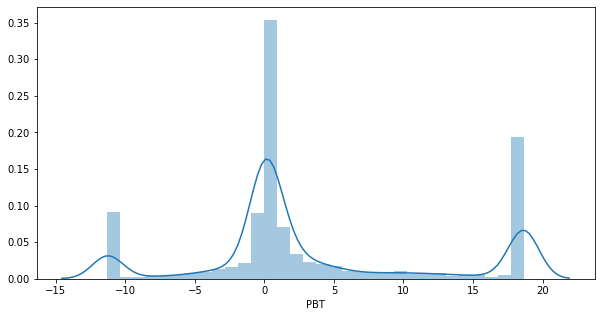

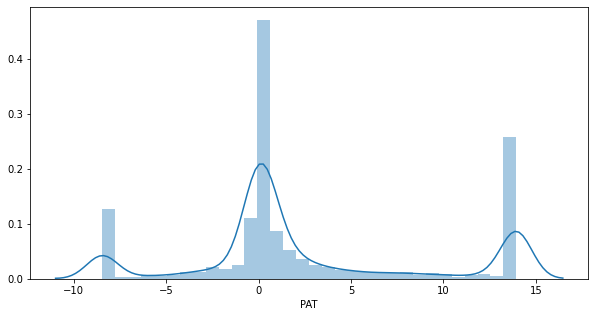

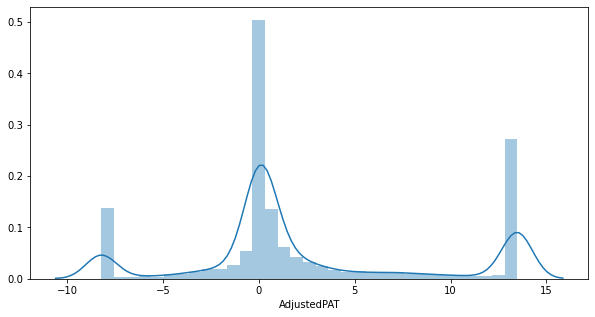

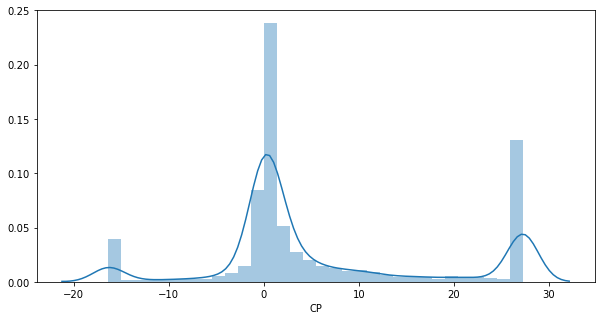

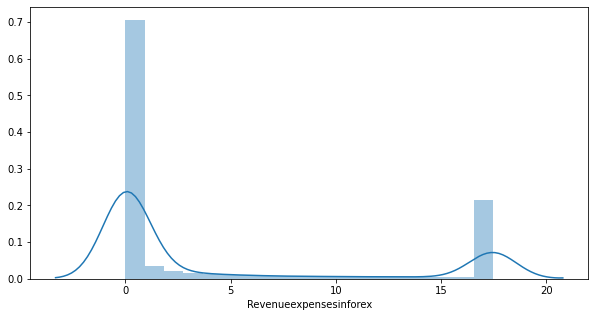

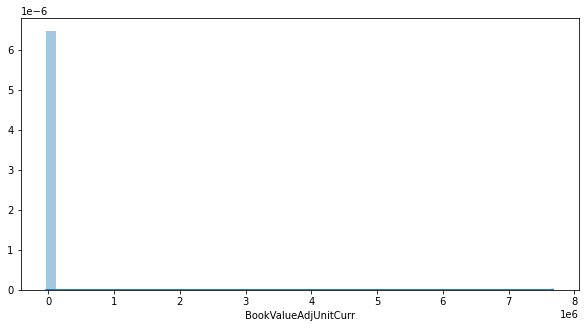

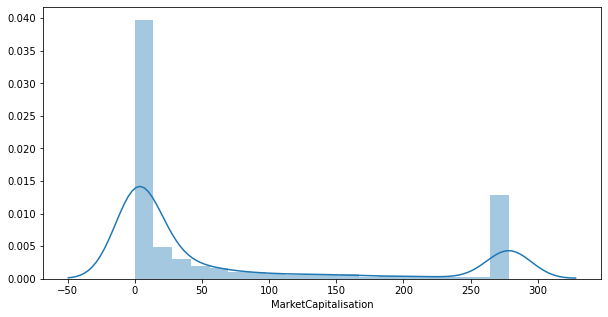

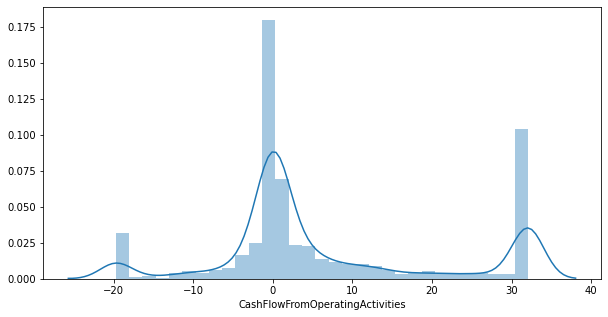

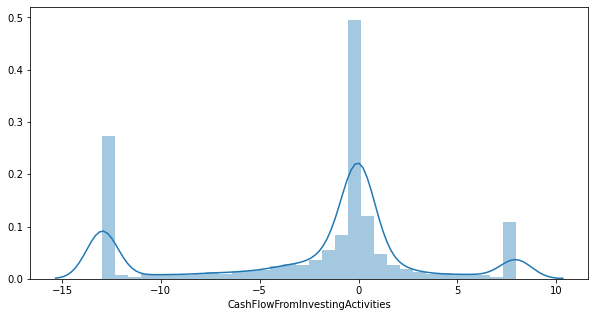

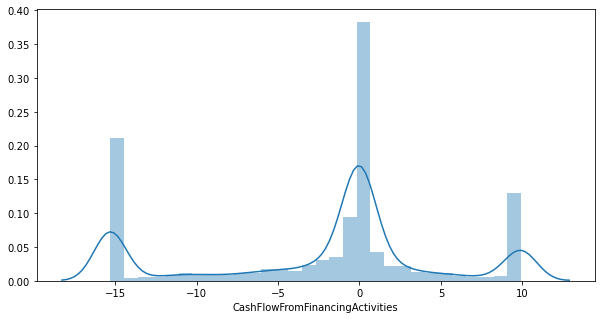

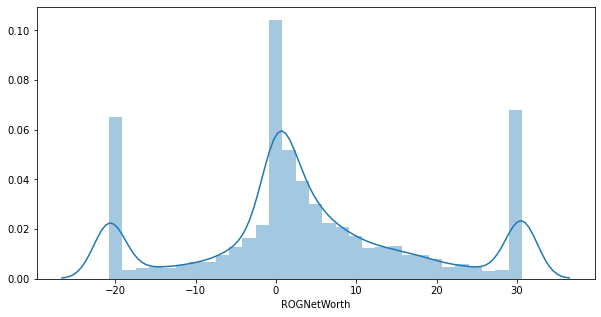

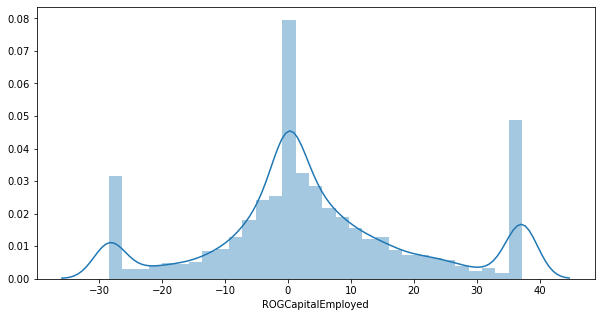

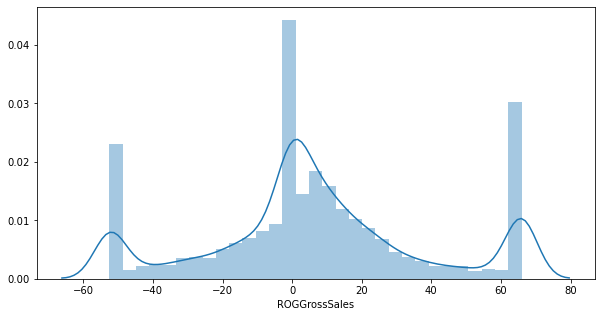

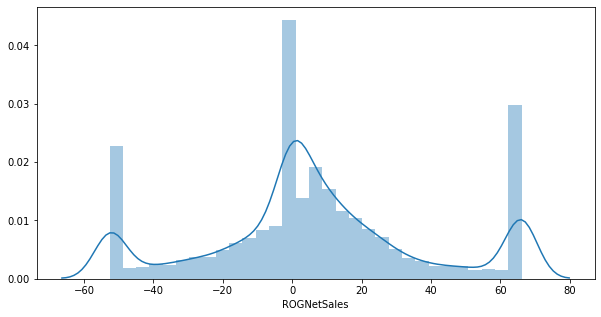

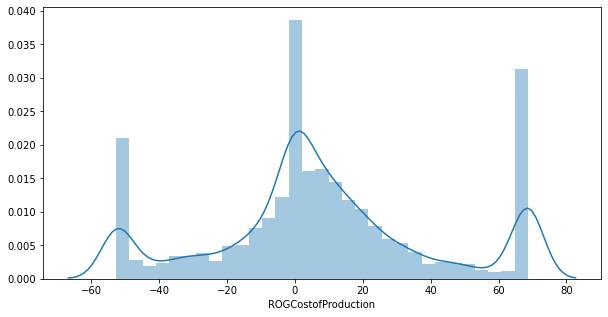

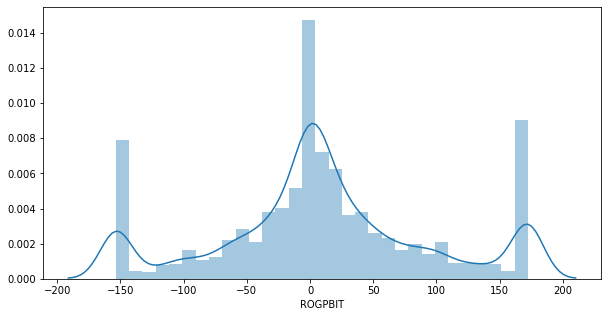

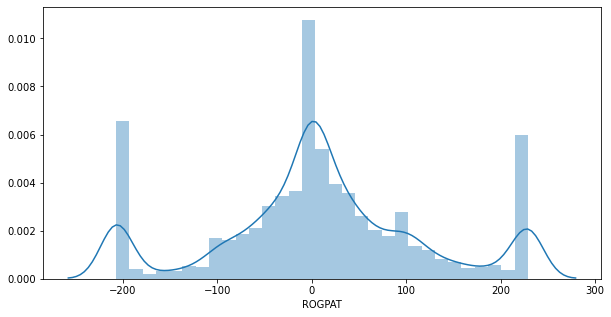

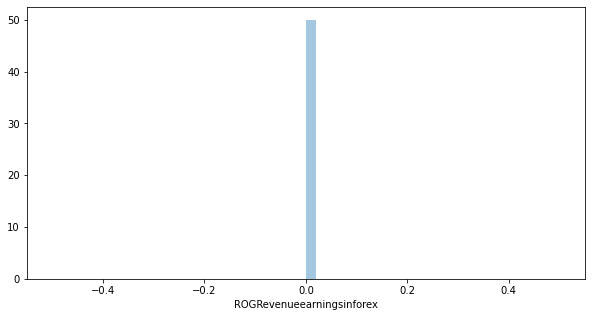

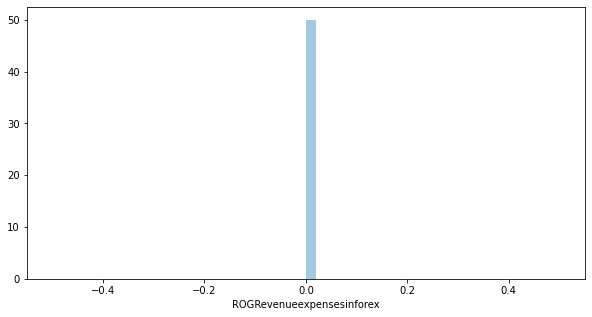

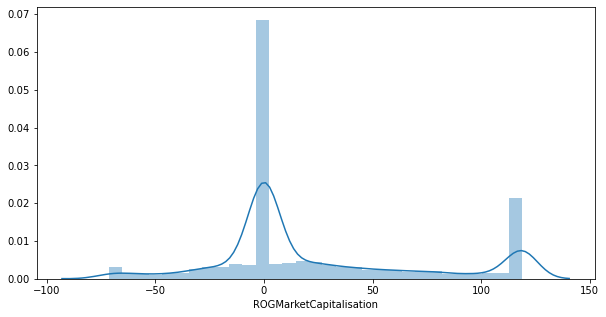

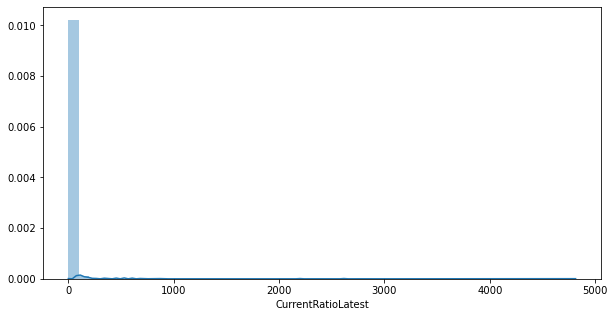

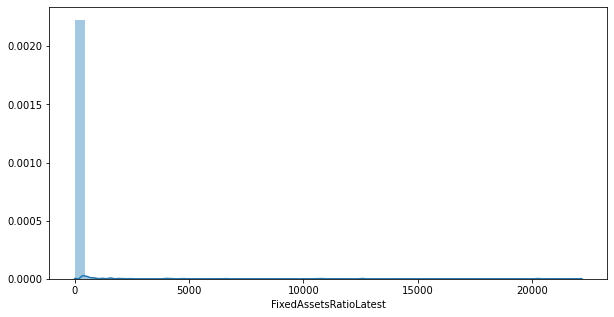

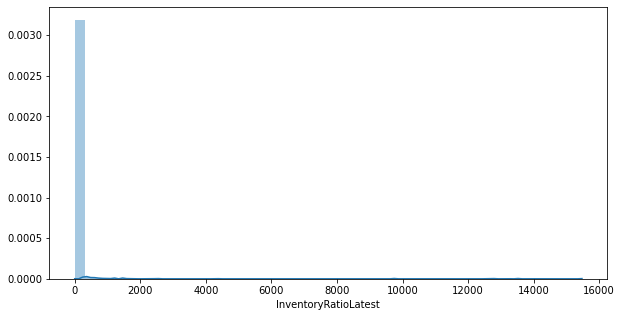

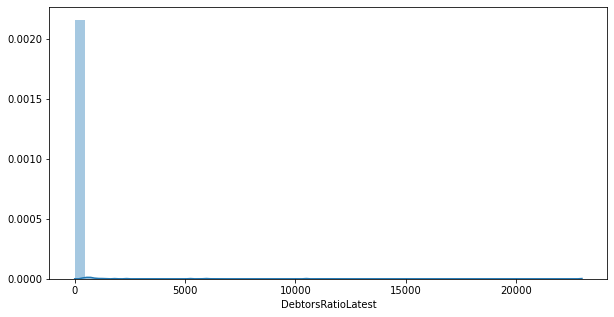

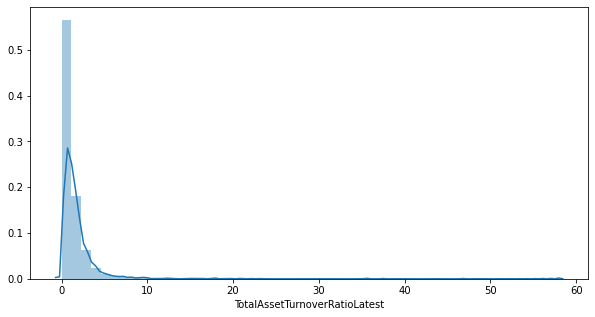

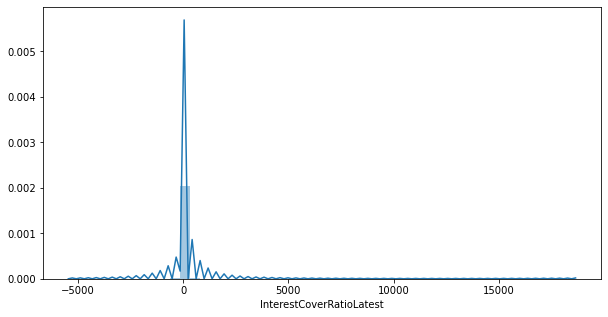

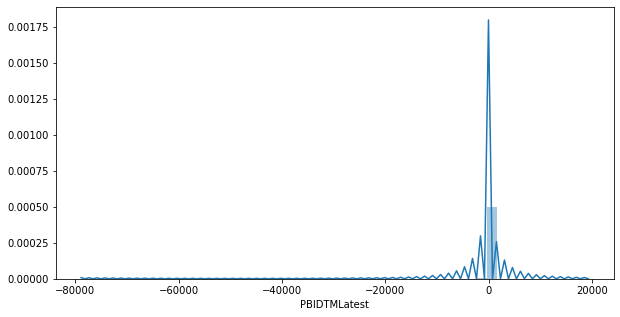

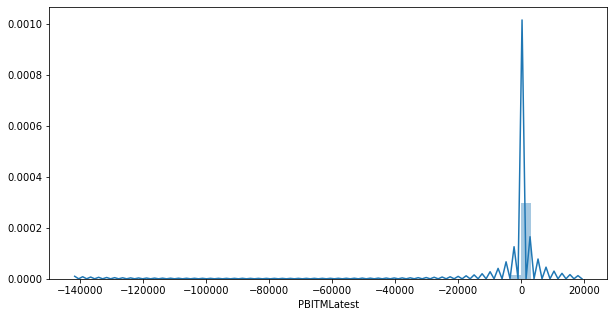

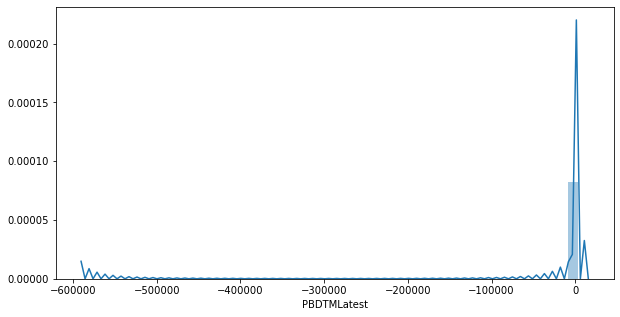

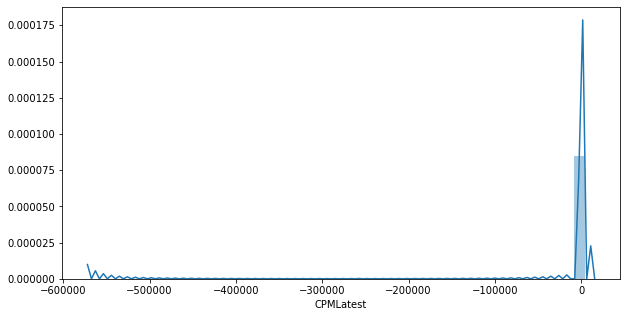

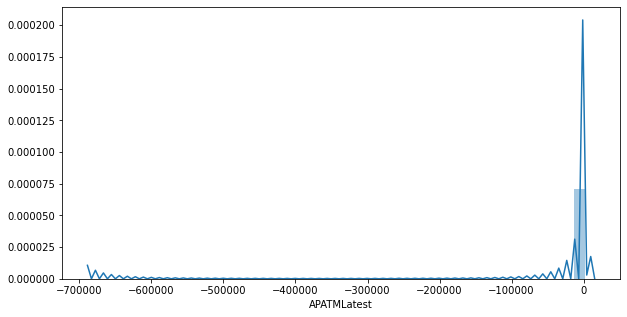

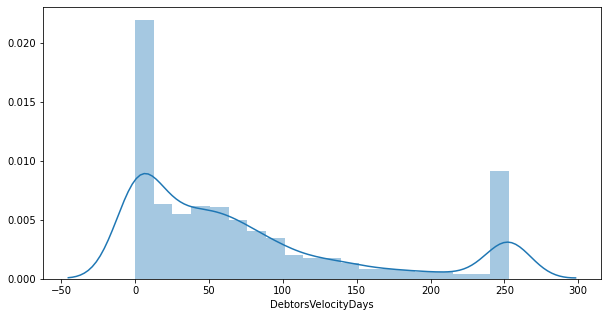

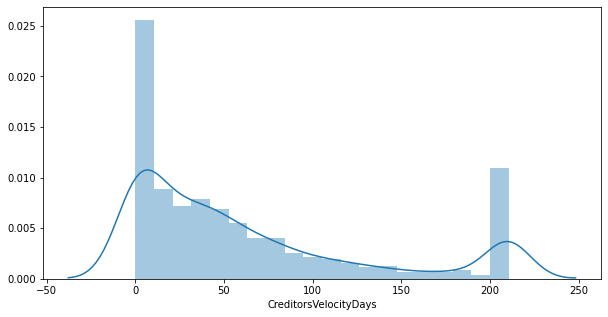

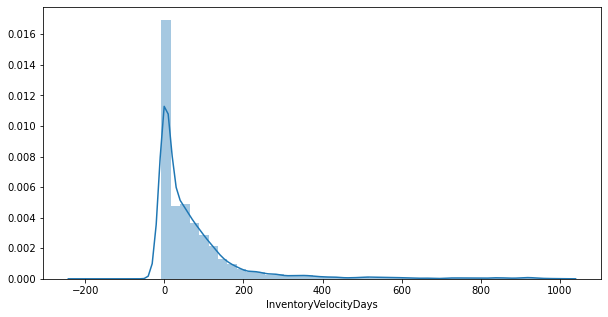

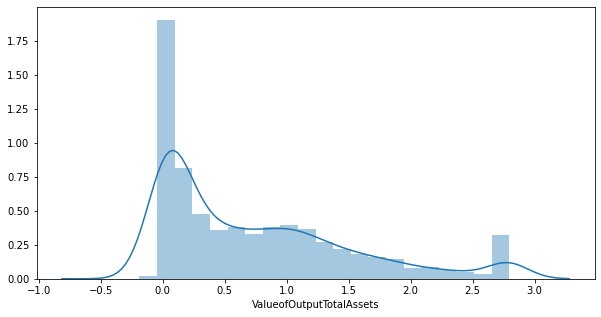

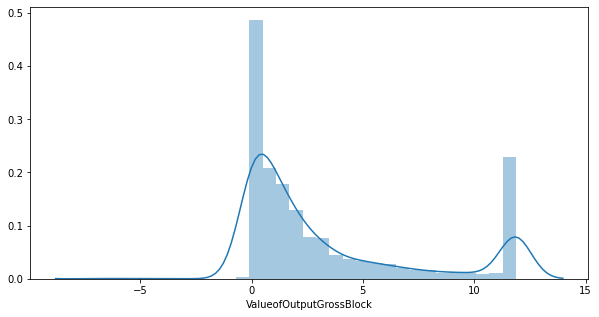

In [21]:
for cols in df.columns:
    fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,5))
    sns.distplot(df[cols])

In [22]:
# Correlation map
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',square=True)

# Question 5 - Train Test Split

In [23]:
import statsmodels.formula.api as smf

In [24]:
df.columns

Index(['NetworthNextYear', 'EquityPaidUp', 'Networth', 'CapitalEmployed',
       'TotalDebt', 'GrossBlock', 'NetWorkingCapital', 'CurrentAssets',
       'CurrentLiabilitiesandProvisions', 'TotalAssetsLiabilities',
       'GrossSales', 'NetSales', 'OtherIncome', 'ValueOfOutput',
       'CostofProduction', 'SellingCost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'AdjustedPAT', 'CP', 'Revenueearningsinforex',
       'Revenueexpensesinforex', 'Capitalexpensesinforex', 'BookValueUnitCurr',
       'BookValueAdjUnitCurr', 'MarketCapitalisation',
       'CEPSannualisedUnitCurr', 'CashFlowFromOperatingActivities',
       'CashFlowFromInvestingActivities', 'CashFlowFromFinancingActivities',
       'ROGNetWorth', 'ROGCapitalEmployed', 'ROGGrossBlock', 'ROGGrossSales',
       'ROGNetSales', 'ROGCostofProduction', 'ROGTotalAssets', 'ROGPBIDT',
       'ROGPBDT', 'ROGPBIT', 'ROGPBT', 'ROGPAT', 'ROGCP',
       'ROGRevenueearningsinforex', 'ROGRevenueexpensesinforex',
       'ROGMarketCapitalisatio

In [25]:
f_1='default ~ NetworthNextYear + EquityPaidUp + Networth + CapitalEmployed + TotalDebt + GrossBlock + NetWorkingCapital + CurrentAssets + CurrentLiabilitiesandProvisions + TotalAssetsLiabilities + GrossSales + NetSales + OtherIncome + ValueOfOutput + CostofProduction + SellingCost + PBIDT + PBDT + PBIT + PBT + PAT + AdjustedPAT + CP + Revenueearningsinforex + Revenueexpensesinforex + Capitalexpensesinforex + BookValueUnitCurr + BookValueAdjUnitCurr + MarketCapitalisation + CEPSannualisedUnitCurr + CashFlowFromOperatingActivities + CashFlowFromInvestingActivities + CashFlowFromFinancingActivities + ROGNetWorth + ROGCapitalEmployed + ROGGrossBlock + ROGGrossSales + ROGNetSales + ROGCostofProduction + ROGTotalAssets + ROGPBIDT + ROGPBDT + ROGPBIT + ROGPBT + ROGPAT + ROGCP + ROGRevenueearningsinforex + ROGRevenueexpensesinforex + ROGMarketCapitalisation + CurrentRatioLatest + FixedAssetsRatioLatest + InventoryRatioLatest + DebtorsRatioLatest + TotalAssetTurnoverRatioLatest + InterestCoverRatioLatest + PBIDTMLatest + PBITMLatest + PBDTMLatest + CPMLatest + APATMLatest + DebtorsVelocityDays + CreditorsVelocityDays + InventoryVelocityDays + ValueofOutputTotalAssets + ValueofOutputGrossBlock'

In [26]:
model_1=smf.ols(formula=f_1,data=df).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                default   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     34.43
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.57e-308
Time:                        20:30:38   Log-Likelihood:                -27.245
No. Observations:                3478   AIC:                             180.5
Df Residuals:                    3415   BIC:                             568.2
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [27]:
# Importing variance infaltion factor to treat correlation
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    
    return(vif)

In [28]:
x=df.drop('default',axis=1)

calc_vif(x).sort_values(by='VIF',ascending=False)

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables           VIF
59                APATMLatest  6.833990e+12
58                  CPMLatest  4.984615e+12
56                PBITMLatest  4.064987e+11
55               PBIDTMLatest  1.386341e+11
57                PBDTMLatest  4.709330e+03
..                        ...           ...
49         CurrentRatioLatest  1.023181e+00
27       BookValueAdjUnitCurr  1.013889e+00
25     Capitalexpensesinforex           NaN
46  ROGRevenueearningsinforex           NaN
47  ROGRevenueexpensesinforex           NaN

[65 rows x 2 columns]

In [29]:
x=x.drop('APATMLatest',axis=1)
calc_vif(x).sort_values(by='VIF',ascending=False)

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables          VIF
57                PBDTMLatest  4708.925199
58                  CPMLatest  4437.732852
11                   NetSales  1673.613959
10                 GrossSales   952.227029
13              ValueOfOutput   676.654907
..                        ...          ...
49         CurrentRatioLatest     1.023176
27       BookValueAdjUnitCurr     1.013884
25     Capitalexpensesinforex          NaN
46  ROGRevenueearningsinforex          NaN
47  ROGRevenueexpensesinforex          NaN

[64 rows x 2 columns]

In [30]:
x=x.drop('PBDTMLatest',axis=1)
calc_vif(x).sort_values(by='VIF',ascending=False)

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables          VIF
11                   NetSales  1672.874117
10                 GrossSales   951.889141
13              ValueOfOutput   676.554000
36              ROGGrossSales   526.654056
37                ROGNetSales   526.089745
..                        ...          ...
49         CurrentRatioLatest     1.022939
27       BookValueAdjUnitCurr     1.013883
25     Capitalexpensesinforex          NaN
46  ROGRevenueearningsinforex          NaN
47  ROGRevenueexpensesinforex          NaN

[63 rows x 2 columns]

In [31]:
x=x.drop('NetSales',axis=1)
calc_vif(x).sort_values(by='VIF',ascending=False)

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables         VIF
35              ROGGrossSales  511.117373
36                ROGNetSales  510.078572
10                 GrossSales  412.214558
12              ValueOfOutput  395.883972
16                       PBDT  115.147478
..                        ...         ...
48         CurrentRatioLatest    1.022927
26       BookValueAdjUnitCurr    1.013877
24     Capitalexpensesinforex         NaN
45  ROGRevenueearningsinforex         NaN
46  ROGRevenueexpensesinforex         NaN

[62 rows x 2 columns]

In [32]:
x=x.drop('ROGGrossSales',axis=1)
calc_vif(x).sort_values(by='VIF',ascending=False)

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables         VIF
10                 GrossSales  407.055240
12              ValueOfOutput  391.261208
16                       PBDT  114.659546
9      TotalAssetsLiabilities  104.642075
21                         CP  101.617794
..                        ...         ...
47         CurrentRatioLatest    1.022927
26       BookValueAdjUnitCurr    1.013650
24     Capitalexpensesinforex         NaN
44  ROGRevenueearningsinforex         NaN
45  ROGRevenueexpensesinforex         NaN

[61 rows x 2 columns]

In [33]:
x=x.drop('GrossSales',axis=1)
calc_vif(x).sort_values(by='VIF',ascending=False)

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables         VIF
15                             PBDT  114.644920
9            TotalAssetsLiabilities  104.626221
20                               CP  101.605689
18                              PAT   74.034676
17                              PBT   72.821894
3                   CapitalEmployed   71.563413
11                    ValueOfOutput   60.800931
12                 CostofProduction   48.663733
7                     CurrentAssets   33.118068
14                            PBIDT   31.582860
16                             PBIT   28.545099
2                          Networth   27.677442
38                          ROGPBDT   24.875220
8   CurrentLiabilitiesandProvisions   23.379458
0                  NetworthNextYear   22.066390
40                           ROGPBT   19.121776
42                            ROGCP   18.286525
19                      AdjustedPAT   16.552127
37                         ROGPBIDT   15.017359
41                           ROGPAT   14.694771
53                      PBITMLatest   13.752901
39                          ROGPBIT   12.358441
5                        GrossBlock   11.955668
54                        CPMLatest    7.080205
4                         TotalDebt    7.013219
27           CEPSannualisedUnitCurr    6.544645
6                 NetWorkingCapital    5.287371
24                BookValueUnitCurr    5.010784
26             MarketCapitalisation    4.589375
13                      SellingCost    4.538504
10                      OtherIncome    4.512444
52                     PBIDTMLatest    4.329889
1                      EquityPaidUp    4.274646
58         ValueofOutputTotalAssets    4.213469
32               ROGCapitalEmployed    3.980468
28  CashFlowFromOperatingActivities    3.803020
22           Revenueexpensesinforex    3.792853
36                   ROGTotalAssets    3.321112
21           Revenueearningsinforex    3.099353
30  CashFlowFromFinancingActivities    2.958661
31                      ROGNetWorth    2.954009
59          ValueofOutputGrossBlock    2.630296
29  CashFlowFromInvestingActivities    2.460681
56            CreditorsVelocityDays    2.289464
55              DebtorsVelocityDays    2.223208
34                      ROGNetSales    2.157452
35              ROGCostofProduction    2.046077
50    TotalAssetTurnoverRatioLatest    1.964813
45          ROGMarketCapitalisation    1.658879
33                    ROGGrossBlock    1.557236
57            InventoryVelocityDays    1.365519
47           FixedAssetsRatioLatest    1.105032
51         InterestCoverRatioLatest    1.064664
48             InventoryRatioLatest    1.031458
49               DebtorsRatioLatest    1.024528
46               CurrentRatioLatest    1.022924
25             BookValueAdjUnitCurr    1.013602
23           Capitalexpensesinforex         NaN
43        ROGRevenueearningsinforex         NaN
44        ROGRevenueexpensesinforex         NaN

In [34]:
x=x.drop('PBDT',axis=1)
calc_vif(x).sort_values(by='VIF',ascending=False)

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables         VIF
9            TotalAssetsLiabilities  104.543704
3                   CapitalEmployed   71.467729
17                              PAT   65.250084
11                    ValueOfOutput   60.799937
16                              PBT   53.453404
12                 CostofProduction   48.631374
7                     CurrentAssets   33.096766
14                            PBIDT   31.159963
15                             PBIT   28.544570
2                          Networth   27.677411
37                          ROGPBDT   24.138468
8   CurrentLiabilitiesandProvisions   23.368259
0                  NetworthNextYear   22.058638
19                               CP   19.607714
39                           ROGPBT   19.121278
41                            ROGCP   17.870702
18                      AdjustedPAT   16.544548
36                         ROGPBIDT   14.970256
40                           ROGPAT   14.692510
52                      PBITMLatest   13.749847
38                          ROGPBIT   12.357298
5                        GrossBlock   11.949786
53                        CPMLatest    7.079563
4                         TotalDebt    7.005117
26           CEPSannualisedUnitCurr    6.530797
6                 NetWorkingCapital    5.286211
23                BookValueUnitCurr    5.004375
25             MarketCapitalisation    4.589375
13                      SellingCost    4.524812
10                      OtherIncome    4.508902
51                     PBIDTMLatest    4.329356
1                      EquityPaidUp    4.268527
57         ValueofOutputTotalAssets    4.213134
31               ROGCapitalEmployed    3.979320
27  CashFlowFromOperatingActivities    3.803020
21           Revenueexpensesinforex    3.792852
35                   ROGTotalAssets    3.320972
20           Revenueearningsinforex    3.095154
29  CashFlowFromFinancingActivities    2.955503
30                      ROGNetWorth    2.952712
58          ValueofOutputGrossBlock    2.630217
28  CashFlowFromInvestingActivities    2.460607
55            CreditorsVelocityDays    2.288425
54              DebtorsVelocityDays    2.222202
33                      ROGNetSales    2.156860
34              ROGCostofProduction    2.045875
49    TotalAssetTurnoverRatioLatest    1.964780
44          ROGMarketCapitalisation    1.658820
32                    ROGGrossBlock    1.556674
56            InventoryVelocityDays    1.365450
46           FixedAssetsRatioLatest    1.105029
50         InterestCoverRatioLatest    1.064600
47             InventoryRatioLatest    1.031439
48               DebtorsRatioLatest    1.024528
45               CurrentRatioLatest    1.022914
24             BookValueAdjUnitCurr    1.013602
22           Capitalexpensesinforex         NaN
42        ROGRevenueearningsinforex         NaN
43        ROGRevenueexpensesinforex         NaN

In [35]:
x=x.drop('TotalAssetsLiabilities',axis=1)
calc_vif(x).sort_values(by='VIF',ascending=False)

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables        VIF
16                              PAT  65.241401
10                    ValueOfOutput  60.747970
15                              PBT  53.437675
11                 CostofProduction  48.479675
7                     CurrentAssets  31.122109
13                            PBIDT  30.738989
14                             PBIT  28.470571
2                          Networth  27.660385
36                          ROGPBDT  24.138363
3                   CapitalEmployed  23.954035
0                  NetworthNextYear  22.057397
18                               CP  19.596153
38                           ROGPBT  19.121245
8   CurrentLiabilitiesandProvisions  18.003913
40                            ROGCP  17.870461
17                      AdjustedPAT  16.539471
35                         ROGPBIDT  14.970085
39                           ROGPAT  14.691247
51                      PBITMLatest  13.749808
37                          ROGPBIT  12.354170
5                        GrossBlock  11.824943
52                        CPMLatest   7.077276
4                         TotalDebt   6.986543
25           CEPSannualisedUnitCurr   6.525491
6                 NetWorkingCapital   5.093691
22                BookValueUnitCurr   5.000158
24             MarketCapitalisation   4.579797
12                      SellingCost   4.513520
9                       OtherIncome   4.501880
50                     PBIDTMLatest   4.329343
1                      EquityPaidUp   4.267125
56         ValueofOutputTotalAssets   4.180561
30               ROGCapitalEmployed   3.976922
26  CashFlowFromOperatingActivities   3.801674
20           Revenueexpensesinforex   3.788112
34                   ROGTotalAssets   3.317706
19           Revenueearningsinforex   3.095110
28  CashFlowFromFinancingActivities   2.955265
29                      ROGNetWorth   2.952711
57          ValueofOutputGrossBlock   2.626790
27  CashFlowFromInvestingActivities   2.459999
54            CreditorsVelocityDays   2.288300
53              DebtorsVelocityDays   2.222200
32                      ROGNetSales   2.156671
33              ROGCostofProduction   2.045581
48    TotalAssetTurnoverRatioLatest   1.955294
43          ROGMarketCapitalisation   1.658807
31                    ROGGrossBlock   1.555929
55            InventoryVelocityDays   1.364674
45           FixedAssetsRatioLatest   1.104983
49         InterestCoverRatioLatest   1.063172
46             InventoryRatioLatest   1.031203
47               DebtorsRatioLatest   1.024204
44               CurrentRatioLatest   1.022889
23             BookValueAdjUnitCurr   1.013591
21           Capitalexpensesinforex        NaN
41        ROGRevenueearningsinforex        NaN
42        ROGRevenueexpensesinforex        NaN

In [36]:
x=x.drop('PAT',axis=1)
calc_vif(x).sort_values(by='VIF',ascending=False)

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables        VIF
10                    ValueOfOutput  60.619279
11                 CostofProduction  48.442532
7                     CurrentAssets  31.121181
13                            PBIDT  30.621204
14                             PBIT  28.467272
2                          Networth  27.642123
35                          ROGPBDT  24.132140
3                   CapitalEmployed  23.839922
0                  NetworthNextYear  22.049836
15                              PBT  20.986014
37                           ROGPBT  18.693714
17                               CP  18.139194
8   CurrentLiabilitiesandProvisions  17.991315
39                            ROGCP  17.863797
34                         ROGPBIDT  14.963521
16                      AdjustedPAT  14.266251
38                           ROGPAT  14.082701
50                      PBITMLatest  13.748658
36                          ROGPBIT  12.351653
5                        GrossBlock  11.780639
51                        CPMLatest   7.077069
4                         TotalDebt   6.982953
24           CEPSannualisedUnitCurr   6.519964
6                 NetWorkingCapital   5.093633
21                BookValueUnitCurr   4.999216
23             MarketCapitalisation   4.578623
12                      SellingCost   4.513470
9                       OtherIncome   4.451999
49                     PBIDTMLatest   4.328655
1                      EquityPaidUp   4.262553
55         ValueofOutputTotalAssets   4.179587
29               ROGCapitalEmployed   3.976913
25  CashFlowFromOperatingActivities   3.801667
19           Revenueexpensesinforex   3.787575
33                   ROGTotalAssets   3.317701
18           Revenueearningsinforex   3.089301
27  CashFlowFromFinancingActivities   2.955214
28                      ROGNetWorth   2.930068
56          ValueofOutputGrossBlock   2.626687
26  CashFlowFromInvestingActivities   2.459948
53            CreditorsVelocityDays   2.286531
52              DebtorsVelocityDays   2.221079
31                      ROGNetSales   2.154439
32              ROGCostofProduction   2.045204
47    TotalAssetTurnoverRatioLatest   1.954913
42          ROGMarketCapitalisation   1.658701
30                    ROGGrossBlock   1.555415
54            InventoryVelocityDays   1.364608
44           FixedAssetsRatioLatest   1.104040
48         InterestCoverRatioLatest   1.063163
45             InventoryRatioLatest   1.030183
46               DebtorsRatioLatest   1.023204
43               CurrentRatioLatest   1.022828
22             BookValueAdjUnitCurr   1.013581
20           Capitalexpensesinforex        NaN
40        ROGRevenueearningsinforex        NaN
41        ROGRevenueexpensesinforex        NaN

In [37]:
x=x.drop('ValueOfOutput',axis=1)
calc_vif(x).sort_values(by='VIF',ascending=False)

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables        VIF
7                     CurrentAssets  31.079105
12                            PBIDT  29.586680
13                             PBIT  28.460189
2                          Networth  27.632618
34                          ROGPBDT  24.129641
3                   CapitalEmployed  23.780619
0                  NetworthNextYear  22.047032
14                              PBT  20.953774
36                           ROGPBT  18.693329
16                               CP  18.132650
38                            ROGCP  17.862782
8   CurrentLiabilitiesandProvisions  17.558831
33                         ROGPBIDT  14.956424
15                      AdjustedPAT  14.201386
37                           ROGPAT  14.082163
49                      PBITMLatest  13.730929
35                          ROGPBIT  12.349665
10                 CostofProduction  11.647945
5                        GrossBlock  11.627876
50                        CPMLatest   7.073373
4                         TotalDebt   6.975026
23           CEPSannualisedUnitCurr   6.519509
6                 NetWorkingCapital   5.092029
20                BookValueUnitCurr   4.998806
22             MarketCapitalisation   4.574422
11                      SellingCost   4.425719
9                       OtherIncome   4.405536
48                     PBIDTMLatest   4.323474
1                      EquityPaidUp   4.246451
54         ValueofOutputTotalAssets   4.179576
28               ROGCapitalEmployed   3.976673
18           Revenueexpensesinforex   3.787037
24  CashFlowFromOperatingActivities   3.775967
32                   ROGTotalAssets   3.317630
17           Revenueearningsinforex   3.075837
26  CashFlowFromFinancingActivities   2.954907
27                      ROGNetWorth   2.929668
55          ValueofOutputGrossBlock   2.619093
25  CashFlowFromInvestingActivities   2.457180
52            CreditorsVelocityDays   2.282724
51              DebtorsVelocityDays   2.203781
30                      ROGNetSales   2.151139
31              ROGCostofProduction   2.044394
46    TotalAssetTurnoverRatioLatest   1.954172
41          ROGMarketCapitalisation   1.658077
29                    ROGGrossBlock   1.554881
53            InventoryVelocityDays   1.360175
43           FixedAssetsRatioLatest   1.103568
47         InterestCoverRatioLatest   1.063146
44             InventoryRatioLatest   1.030155
45               DebtorsRatioLatest   1.023095
42               CurrentRatioLatest   1.022819
21             BookValueAdjUnitCurr   1.013519
19           Capitalexpensesinforex        NaN
39        ROGRevenueearningsinforex        NaN
40        ROGRevenueexpensesinforex        NaN

In [38]:
x=x.drop('CurrentAssets',axis=1)
calc_vif(x).sort_values(by='VIF',ascending=False)

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables        VIF
11                            PBIDT  29.568164
12                             PBIT  28.431244
2                          Networth  27.510631
33                          ROGPBDT  24.116326
0                  NetworthNextYear  22.046691
3                   CapitalEmployed  21.324931
13                              PBT  20.908219
35                           ROGPBT  18.672341
15                               CP  18.131285
37                            ROGCP  17.862454
32                         ROGPBIDT  14.953149
36                           ROGPAT  14.077564
14                      AdjustedPAT  14.033864
48                      PBITMLatest  13.717136
34                          ROGPBIT  12.345365
5                        GrossBlock  11.397044
9                  CostofProduction  11.088069
7   CurrentLiabilitiesandProvisions  10.798754
49                        CPMLatest   7.069080
4                         TotalDebt   6.906467
22           CEPSannualisedUnitCurr   6.513386
19                BookValueUnitCurr   4.996478
21             MarketCapitalisation   4.572338
10                      SellingCost   4.424159
8                       OtherIncome   4.380112
47                     PBIDTMLatest   4.320447
1                      EquityPaidUp   4.245528
53         ValueofOutputTotalAssets   4.166292
27               ROGCapitalEmployed   3.976212
17           Revenueexpensesinforex   3.786546
23  CashFlowFromOperatingActivities   3.763623
6                 NetWorkingCapital   3.461041
31                   ROGTotalAssets   3.315178
16           Revenueearningsinforex   3.075544
25  CashFlowFromFinancingActivities   2.954743
26                      ROGNetWorth   2.929139
54          ValueofOutputGrossBlock   2.617013
24  CashFlowFromInvestingActivities   2.455266
51            CreditorsVelocityDays   2.282082
50              DebtorsVelocityDays   2.195644
29                      ROGNetSales   2.151002
30              ROGCostofProduction   2.044120
45    TotalAssetTurnoverRatioLatest   1.954095
40          ROGMarketCapitalisation   1.656563
28                    ROGGrossBlock   1.554006
52            InventoryVelocityDays   1.360111
42           FixedAssetsRatioLatest   1.103536
46         InterestCoverRatioLatest   1.057599
43             InventoryRatioLatest   1.029702
41               CurrentRatioLatest   1.022816
44               DebtorsRatioLatest   1.022746
20             BookValueAdjUnitCurr   1.013477
18           Capitalexpensesinforex        NaN
38        ROGRevenueearningsinforex        NaN
39        ROGRevenueexpensesinforex        NaN

In [39]:
x=x.drop('PBIDT',axis=1)
calc_vif(x).sort_values(by='VIF',ascending=False)

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables        VIF
2                          Networth  27.240840
32                          ROGPBDT  24.002939
0                  NetworthNextYear  22.045620
3                   CapitalEmployed  21.316965
12                              PBT  20.535605
34                           ROGPBT  18.612208
36                            ROGCP  17.824950
14                               CP  17.104966
31                         ROGPBIDT  14.448061
35                           ROGPAT  14.077564
13                      AdjustedPAT  13.950004
47                      PBITMLatest  13.712836
11                             PBIT  12.287056
33                          ROGPBIT  12.195977
5                        GrossBlock  11.203884
9                  CostofProduction  11.078942
7   CurrentLiabilitiesandProvisions  10.781033
48                        CPMLatest   7.061401
4                         TotalDebt   6.900382
21           CEPSannualisedUnitCurr   6.487365
18                BookValueUnitCurr   4.962818
20             MarketCapitalisation   4.572105
10                      SellingCost   4.420053
8                       OtherIncome   4.379238
46                     PBIDTMLatest   4.319729
1                      EquityPaidUp   4.241548
52         ValueofOutputTotalAssets   4.166289
26               ROGCapitalEmployed   3.971597
16           Revenueexpensesinforex   3.786336
22  CashFlowFromOperatingActivities   3.747789
6                 NetWorkingCapital   3.461036
30                   ROGTotalAssets   3.315177
15           Revenueearningsinforex   3.074508
24  CashFlowFromFinancingActivities   2.953364
25                      ROGNetWorth   2.928227
53          ValueofOutputGrossBlock   2.616671
23  CashFlowFromInvestingActivities   2.454898
50            CreditorsVelocityDays   2.281682
49              DebtorsVelocityDays   2.195613
28                      ROGNetSales   2.150681
29              ROGCostofProduction   2.043951
44    TotalAssetTurnoverRatioLatest   1.953975
39          ROGMarketCapitalisation   1.655054
27                    ROGGrossBlock   1.553845
51            InventoryVelocityDays   1.360022
41           FixedAssetsRatioLatest   1.103525
45         InterestCoverRatioLatest   1.057478
42             InventoryRatioLatest   1.029702
40               CurrentRatioLatest   1.022812
43               DebtorsRatioLatest   1.022686
19             BookValueAdjUnitCurr   1.013465
17           Capitalexpensesinforex        NaN
37        ROGRevenueearningsinforex        NaN
38        ROGRevenueexpensesinforex        NaN

In [40]:
x=x.drop('Networth',axis=1)
calc_vif(x).sort_values(by='VIF',ascending=False)

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables        VIF
31                          ROGPBDT  24.002348
11                              PBT  20.424839
2                   CapitalEmployed  18.878246
33                           ROGPBT  18.612092
35                            ROGCP  17.814082
13                               CP  17.036354
30                         ROGPBIDT  14.418691
34                           ROGPAT  14.076923
12                      AdjustedPAT  13.830323
46                      PBITMLatest  13.712482
10                             PBIT  12.286666
32                          ROGPBIT  12.188745
4                        GrossBlock  11.203542
8                  CostofProduction  11.075460
6   CurrentLiabilitiesandProvisions  10.765081
0                  NetworthNextYear   9.708337
47                        CPMLatest   7.061401
3                         TotalDebt   6.681114
20           CEPSannualisedUnitCurr   6.309699
17                BookValueUnitCurr   4.689035
19             MarketCapitalisation   4.560476
9                       SellingCost   4.419853
7                       OtherIncome   4.371887
45                     PBIDTMLatest   4.319074
1                      EquityPaidUp   4.234374
51         ValueofOutputTotalAssets   4.162393
25               ROGCapitalEmployed   3.969985
15           Revenueexpensesinforex   3.786217
21  CashFlowFromOperatingActivities   3.746777
5                 NetWorkingCapital   3.447383
29                   ROGTotalAssets   3.315143
14           Revenueearningsinforex   3.074256
23  CashFlowFromFinancingActivities   2.952575
24                      ROGNetWorth   2.926283
52          ValueofOutputGrossBlock   2.615735
22  CashFlowFromInvestingActivities   2.448579
49            CreditorsVelocityDays   2.281672
48              DebtorsVelocityDays   2.195509
27                      ROGNetSales   2.150600
28              ROGCostofProduction   2.043119
43    TotalAssetTurnoverRatioLatest   1.953955
38          ROGMarketCapitalisation   1.653838
26                    ROGGrossBlock   1.553590
50            InventoryVelocityDays   1.359931
40           FixedAssetsRatioLatest   1.103062
44         InterestCoverRatioLatest   1.057411
41             InventoryRatioLatest   1.029129
39               CurrentRatioLatest   1.022724
42               DebtorsRatioLatest   1.022545
18             BookValueAdjUnitCurr   1.013447
16           Capitalexpensesinforex        NaN
36        ROGRevenueearningsinforex        NaN
37        ROGRevenueexpensesinforex        NaN

In [41]:
x=x.drop('ROGPBDT',axis=1)
calc_vif(x).sort_values(by='VIF',ascending=False)

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables        VIF
11                              PBT  20.424340
2                   CapitalEmployed  18.878226
13                               CP  16.918540
12                      AdjustedPAT  13.822944
45                      PBITMLatest  13.672009
10                             PBIT  12.282265
30                         ROGPBIDT  11.831373
31                          ROGPBIT  11.567586
33                           ROGPAT  11.317131
4                        GrossBlock  11.202668
8                  CostofProduction  11.074625
6   CurrentLiabilitiesandProvisions  10.760919
32                           ROGPBT  10.544594
0                  NetworthNextYear   9.696125
34                            ROGCP   9.277778
46                        CPMLatest   7.043428
3                         TotalDebt   6.679644
20           CEPSannualisedUnitCurr   6.309500
17                BookValueUnitCurr   4.686930
19             MarketCapitalisation   4.560108
9                       SellingCost   4.419088
7                       OtherIncome   4.370080
44                     PBIDTMLatest   4.309580
1                      EquityPaidUp   4.233116
50         ValueofOutputTotalAssets   4.162387
25               ROGCapitalEmployed   3.962168
15           Revenueexpensesinforex   3.785878
21  CashFlowFromOperatingActivities   3.746468
5                 NetWorkingCapital   3.446221
29                   ROGTotalAssets   3.315092
14           Revenueearningsinforex   3.074256
23  CashFlowFromFinancingActivities   2.951759
24                      ROGNetWorth   2.922418
51          ValueofOutputGrossBlock   2.615621
22  CashFlowFromInvestingActivities   2.448459
48            CreditorsVelocityDays   2.278932
47              DebtorsVelocityDays   2.194896
27                      ROGNetSales   2.149719
28              ROGCostofProduction   2.042044
42    TotalAssetTurnoverRatioLatest   1.953891
37          ROGMarketCapitalisation   1.653776
26                    ROGGrossBlock   1.553483
49            InventoryVelocityDays   1.359539
39           FixedAssetsRatioLatest   1.102874
43         InterestCoverRatioLatest   1.057397
40             InventoryRatioLatest   1.029128
38               CurrentRatioLatest   1.022717
41               DebtorsRatioLatest   1.022495
18             BookValueAdjUnitCurr   1.013084
16           Capitalexpensesinforex        NaN
35        ROGRevenueearningsinforex        NaN
36        ROGRevenueexpensesinforex        NaN

In [42]:
x=x.drop('PBT',axis=1)
calc_vif(x).sort_values(by='VIF',ascending=False)

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables        VIF
2                   CapitalEmployed  18.877158
12                               CP  15.544505
44                      PBITMLatest  13.671204
29                         ROGPBIDT  11.755054
10                             PBIT  11.685534
30                          ROGPBIT  11.420103
32                           ROGPAT  11.313957
4                        GrossBlock  11.172732
8                  CostofProduction  11.071230
6   CurrentLiabilitiesandProvisions  10.756433
31                           ROGPBT  10.199424
0                  NetworthNextYear   9.682361
33                            ROGCP   9.149272
45                        CPMLatest   7.043383
3                         TotalDebt   6.643377
11                      AdjustedPAT   6.592914
19           CEPSannualisedUnitCurr   6.283087
16                BookValueUnitCurr   4.682186
18             MarketCapitalisation   4.559057
9                       SellingCost   4.418123
43                     PBIDTMLatest   4.309580
7                       OtherIncome   4.305246
1                      EquityPaidUp   4.233083
49         ValueofOutputTotalAssets   4.162328
24               ROGCapitalEmployed   3.958047
14           Revenueexpensesinforex   3.783664
20  CashFlowFromOperatingActivities   3.735298
5                 NetWorkingCapital   3.444829
28                   ROGTotalAssets   3.314050
13           Revenueearningsinforex   3.071783
22  CashFlowFromFinancingActivities   2.950657
23                      ROGNetWorth   2.901532
50          ValueofOutputGrossBlock   2.615392
21  CashFlowFromInvestingActivities   2.445731
47            CreditorsVelocityDays   2.278924
46              DebtorsVelocityDays   2.194896
26                      ROGNetSales   2.148474
27              ROGCostofProduction   2.041219
41    TotalAssetTurnoverRatioLatest   1.953885
36          ROGMarketCapitalisation   1.653632
25                    ROGGrossBlock   1.551745
48            InventoryVelocityDays   1.359538
38           FixedAssetsRatioLatest   1.102442
42         InterestCoverRatioLatest   1.057397
39             InventoryRatioLatest   1.028571
37               CurrentRatioLatest   1.022711
40               DebtorsRatioLatest   1.022121
17             BookValueAdjUnitCurr   1.013076
15           Capitalexpensesinforex        NaN
34        ROGRevenueearningsinforex        NaN
35        ROGRevenueexpensesinforex        NaN

In [43]:
x=x.drop('CapitalEmployed',axis=1)
calc_vif(x).sort_values(by='VIF',ascending=False)

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables        VIF
11                               CP  15.449394
43                      PBITMLatest  13.670205
28                         ROGPBIDT  11.755011
9                              PBIT  11.638472
29                          ROGPBIT  11.417479
31                           ROGPAT  11.313930
7                  CostofProduction  11.066408
5   CurrentLiabilitiesandProvisions  10.623731
3                        GrossBlock  10.551926
30                           ROGPBT  10.199421
32                            ROGCP   9.149212
44                        CPMLatest   7.040602
0                  NetworthNextYear   6.927420
10                      AdjustedPAT   6.592872
18           CEPSannualisedUnitCurr   6.270312
2                         TotalDebt   5.767497
15                BookValueUnitCurr   4.646116
17             MarketCapitalisation   4.538912
8                       SellingCost   4.411626
42                     PBIDTMLatest   4.309276
6                       OtherIncome   4.265534
1                      EquityPaidUp   4.131733
48         ValueofOutputTotalAssets   4.051086
23               ROGCapitalEmployed   3.937673
13           Revenueexpensesinforex   3.783118
19  CashFlowFromOperatingActivities   3.733744
27                   ROGTotalAssets   3.313961
4                 NetWorkingCapital   3.214518
12           Revenueearningsinforex   3.070804
21  CashFlowFromFinancingActivities   2.950656
22                      ROGNetWorth   2.888232
49          ValueofOutputGrossBlock   2.588394
20  CashFlowFromInvestingActivities   2.445726
46            CreditorsVelocityDays   2.272853
45              DebtorsVelocityDays   2.194779
25                      ROGNetSales   2.144197
26              ROGCostofProduction   2.040893
40    TotalAssetTurnoverRatioLatest   1.953316
35          ROGMarketCapitalisation   1.647585
24                    ROGGrossBlock   1.551711
47            InventoryVelocityDays   1.357356
37           FixedAssetsRatioLatest   1.102342
41         InterestCoverRatioLatest   1.053327
38             InventoryRatioLatest   1.028307
36               CurrentRatioLatest   1.022632
39               DebtorsRatioLatest   1.021972
16             BookValueAdjUnitCurr   1.013059
14           Capitalexpensesinforex        NaN
33        ROGRevenueearningsinforex        NaN
34        ROGRevenueexpensesinforex        NaN

In [44]:
x=x.drop('CP',axis=1)
calc_vif(x).sort_values(by='VIF',ascending=False)

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables        VIF
42                      PBITMLatest  13.647068
27                         ROGPBIDT  11.631807
28                          ROGPBIT  11.416843
30                           ROGPAT  11.286649
7                  CostofProduction  11.065974
5   CurrentLiabilitiesandProvisions  10.435295
29                           ROGPBT  10.199385
3                        GrossBlock   9.955334
31                            ROGCP   8.852823
9                              PBIT   7.761465
43                        CPMLatest   7.030749
0                  NetworthNextYear   6.599208
2                         TotalDebt   5.694633
17           CEPSannualisedUnitCurr   5.654631
10                      AdjustedPAT   5.318627
16             MarketCapitalisation   4.536269
14                BookValueUnitCurr   4.415146
8                       SellingCost   4.411568
41                     PBIDTMLatest   4.302583
6                       OtherIncome   4.264449
1                      EquityPaidUp   4.130165
47         ValueofOutputTotalAssets   4.050360
22               ROGCapitalEmployed   3.936573
12           Revenueexpensesinforex   3.782560
18  CashFlowFromOperatingActivities   3.733074
26                   ROGTotalAssets   3.313029
4                 NetWorkingCapital   3.214083
11           Revenueearningsinforex   3.069924
20  CashFlowFromFinancingActivities   2.945918
21                      ROGNetWorth   2.888014
48          ValueofOutputGrossBlock   2.586827
19  CashFlowFromInvestingActivities   2.445545
45            CreditorsVelocityDays   2.272284
44              DebtorsVelocityDays   2.193843
24                      ROGNetSales   2.143726
25              ROGCostofProduction   2.039763
39    TotalAssetTurnoverRatioLatest   1.953225
34          ROGMarketCapitalisation   1.647165
23                    ROGGrossBlock   1.550208
46            InventoryVelocityDays   1.357181
36           FixedAssetsRatioLatest   1.102336
40         InterestCoverRatioLatest   1.052914
37             InventoryRatioLatest   1.028197
35               CurrentRatioLatest   1.022605
38               DebtorsRatioLatest   1.021922
15             BookValueAdjUnitCurr   1.013033
13           Capitalexpensesinforex        NaN
32        ROGRevenueearningsinforex        NaN
33        ROGRevenueexpensesinforex        NaN

In [45]:
x=x.drop('PBITMLatest',axis=1)
calc_vif(x).sort_values(by='VIF',ascending=False)

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables        VIF
27                         ROGPBIDT  11.562704
28                          ROGPBIT  11.414907
30                           ROGPAT  11.278548
7                  CostofProduction  11.061876
5   CurrentLiabilitiesandProvisions  10.435276
29                           ROGPBT  10.184226
3                        GrossBlock   9.955294
31                            ROGCP   8.819184
9                              PBIT   7.750427
0                  NetworthNextYear   6.599152
2                         TotalDebt   5.694632
17           CEPSannualisedUnitCurr   5.639394
10                      AdjustedPAT   5.313776
16             MarketCapitalisation   4.522936
8                       SellingCost   4.411265
14                BookValueUnitCurr   4.400668
6                       OtherIncome   4.261557
1                      EquityPaidUp   4.129577
46         ValueofOutputTotalAssets   4.047860
22               ROGCapitalEmployed   3.935018
12           Revenueexpensesinforex   3.782362
18  CashFlowFromOperatingActivities   3.730844
26                   ROGTotalAssets   3.312996
4                 NetWorkingCapital   3.214080
11           Revenueearningsinforex   3.069872
20  CashFlowFromFinancingActivities   2.945441
21                      ROGNetWorth   2.887628
47          ValueofOutputGrossBlock   2.586667
19  CashFlowFromInvestingActivities   2.442164
44            CreditorsVelocityDays   2.271942
43              DebtorsVelocityDays   2.193822
24                      ROGNetSales   2.142160
25              ROGCostofProduction   2.039686
39    TotalAssetTurnoverRatioLatest   1.953214
34          ROGMarketCapitalisation   1.643800
23                    ROGGrossBlock   1.550208
45            InventoryVelocityDays   1.357098
42                        CPMLatest   1.347940
41                     PBIDTMLatest   1.330928
36           FixedAssetsRatioLatest   1.102331
40         InterestCoverRatioLatest   1.052836
37             InventoryRatioLatest   1.028195
35               CurrentRatioLatest   1.022517
38               DebtorsRatioLatest   1.021890
15             BookValueAdjUnitCurr   1.013029
13           Capitalexpensesinforex        NaN
32        ROGRevenueearningsinforex        NaN
33        ROGRevenueexpensesinforex        NaN

In [46]:
x=x.drop('ROGPBIDT',axis=1)
calc_vif(x).sort_values(by='VIF',ascending=False)

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables        VIF
7                  CostofProduction  11.061596
5   CurrentLiabilitiesandProvisions  10.435132
28                           ROGPBT  10.167512
3                        GrossBlock   9.955283
29                           ROGPAT   9.710363
9                              PBIT   7.741241
0                  NetworthNextYear   6.597684
2                         TotalDebt   5.693831
27                          ROGPBIT   5.640520
17           CEPSannualisedUnitCurr   5.638959
10                      AdjustedPAT   5.312585
30                            ROGCP   4.934417
16             MarketCapitalisation   4.522386
8                       SellingCost   4.409214
14                BookValueUnitCurr   4.400464
6                       OtherIncome   4.260856
1                      EquityPaidUp   4.129288
45         ValueofOutputTotalAssets   4.047808
22               ROGCapitalEmployed   3.929910
12           Revenueexpensesinforex   3.781441
18  CashFlowFromOperatingActivities   3.730844
26                   ROGTotalAssets   3.312154
4                 NetWorkingCapital   3.213091
11           Revenueearningsinforex   3.069544
20  CashFlowFromFinancingActivities   2.943833
21                      ROGNetWorth   2.886061
46          ValueofOutputGrossBlock   2.586526
19  CashFlowFromInvestingActivities   2.442073
43            CreditorsVelocityDays   2.270913
42              DebtorsVelocityDays   2.191296
24                      ROGNetSales   2.138039
25              ROGCostofProduction   2.033733
38    TotalAssetTurnoverRatioLatest   1.951743
33          ROGMarketCapitalisation   1.643052
23                    ROGGrossBlock   1.547368
44            InventoryVelocityDays   1.356945
41                        CPMLatest   1.347940
40                     PBIDTMLatest   1.330877
35           FixedAssetsRatioLatest   1.102211
39         InterestCoverRatioLatest   1.052832
36             InventoryRatioLatest   1.028172
34               CurrentRatioLatest   1.022327
37               DebtorsRatioLatest   1.021869
15             BookValueAdjUnitCurr   1.013010
13           Capitalexpensesinforex        NaN
31        ROGRevenueearningsinforex        NaN
32        ROGRevenueexpensesinforex        NaN

In [47]:
x=x.drop('CostofProduction',axis=1)
calc_vif(x).sort_values(by='VIF',ascending=False)

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables        VIF
27                           ROGPBT  10.165926
28                           ROGPAT   9.709243
3                        GrossBlock   9.250002
5   CurrentLiabilitiesandProvisions   8.948872
8                              PBIT   7.733707
0                  NetworthNextYear   6.593930
2                         TotalDebt   5.693208
16           CEPSannualisedUnitCurr   5.638858
26                          ROGPBIT   5.635924
9                       AdjustedPAT   5.309479
29                            ROGCP   4.932086
15             MarketCapitalisation   4.522153
13                BookValueUnitCurr   4.398277
7                       SellingCost   4.313336
6                       OtherIncome   4.215055
1                      EquityPaidUp   4.121302
21               ROGCapitalEmployed   3.924599
44         ValueofOutputTotalAssets   3.826919
11           Revenueexpensesinforex   3.732933
17  CashFlowFromOperatingActivities   3.728559
25                   ROGTotalAssets   3.299650
10           Revenueearningsinforex   3.069528
4                 NetWorkingCapital   2.975996
19  CashFlowFromFinancingActivities   2.943041
20                      ROGNetWorth   2.882783
45          ValueofOutputGrossBlock   2.571035
18  CashFlowFromInvestingActivities   2.435811
42            CreditorsVelocityDays   2.206013
41              DebtorsVelocityDays   2.182549
23                      ROGNetSales   2.137136
24              ROGCostofProduction   2.033725
37    TotalAssetTurnoverRatioLatest   1.949191
32          ROGMarketCapitalisation   1.637410
22                    ROGGrossBlock   1.547092
43            InventoryVelocityDays   1.351233
40                        CPMLatest   1.341061
39                     PBIDTMLatest   1.330192
34           FixedAssetsRatioLatest   1.101970
38         InterestCoverRatioLatest   1.052800
35             InventoryRatioLatest   1.025841
33               CurrentRatioLatest   1.022292
36               DebtorsRatioLatest   1.021285
14             BookValueAdjUnitCurr   1.012993
12           Capitalexpensesinforex        NaN
30        ROGRevenueearningsinforex        NaN
31        ROGRevenueexpensesinforex        NaN

In [48]:
x=x.drop('ROGPBT',axis=1)
calc_vif(x).sort_values(by='VIF',ascending=False)

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables       VIF
3                        GrossBlock  9.248780
5   CurrentLiabilitiesandProvisions  8.945072
8                              PBIT  7.695437
0                  NetworthNextYear  6.593928
2                         TotalDebt  5.693207
16           CEPSannualisedUnitCurr  5.635671
27                           ROGPAT  5.381243
9                       AdjustedPAT  5.283631
28                            ROGCP  4.883148
15             MarketCapitalisation  4.522143
13                BookValueUnitCurr  4.393546
7                       SellingCost  4.311618
6                       OtherIncome  4.215025
26                          ROGPBIT  4.157418
1                      EquityPaidUp  4.121301
21               ROGCapitalEmployed  3.886353
43         ValueofOutputTotalAssets  3.823153
11           Revenueexpensesinforex  3.732926
17  CashFlowFromOperatingActivities  3.728273
25                   ROGTotalAssets  3.297154
10           Revenueearningsinforex  3.068755
4                 NetWorkingCapital  2.975945
19  CashFlowFromFinancingActivities  2.942716
20                      ROGNetWorth  2.855631
44          ValueofOutputGrossBlock  2.568880
18  CashFlowFromInvestingActivities  2.434989
41            CreditorsVelocityDays  2.204928
40              DebtorsVelocityDays  2.181137
23                      ROGNetSales  2.136843
24              ROGCostofProduction  2.033667
36    TotalAssetTurnoverRatioLatest  1.949022
31          ROGMarketCapitalisation  1.636098
22                    ROGGrossBlock  1.547080
42            InventoryVelocityDays  1.350891
39                        CPMLatest  1.341033
38                     PBIDTMLatest  1.330131
33           FixedAssetsRatioLatest  1.101663
37         InterestCoverRatioLatest  1.052784
34             InventoryRatioLatest  1.025841
32               CurrentRatioLatest  1.022286
35               DebtorsRatioLatest  1.021210
14             BookValueAdjUnitCurr  1.012418
12           Capitalexpensesinforex       NaN
29        ROGRevenueearningsinforex       NaN
30        ROGRevenueexpensesinforex       NaN

In [49]:
x=x.drop('GrossBlock',axis=1)
calc_vif(x).sort_values(by='VIF',ascending=False)

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables       VIF
4   CurrentLiabilitiesandProvisions  7.922148
7                              PBIT  7.657131
0                  NetworthNextYear  6.561109
15           CEPSannualisedUnitCurr  5.596097
26                           ROGPAT  5.380474
8                       AdjustedPAT  5.280558
2                         TotalDebt  5.029728
27                            ROGCP  4.881484
14             MarketCapitalisation  4.496751
12                BookValueUnitCurr  4.393435
6                       SellingCost  4.259891
25                          ROGPBIT  4.157104
5                       OtherIncome  4.134676
1                      EquityPaidUp  4.029524
20               ROGCapitalEmployed  3.868582
42         ValueofOutputTotalAssets  3.776295
16  CashFlowFromOperatingActivities  3.713826
10           Revenueexpensesinforex  3.702391
24                   ROGTotalAssets  3.280077
9            Revenueearningsinforex  3.055096
3                 NetWorkingCapital  2.958942
18  CashFlowFromFinancingActivities  2.924759
19                      ROGNetWorth  2.849448
17  CashFlowFromInvestingActivities  2.416390
43          ValueofOutputGrossBlock  2.384274
40            CreditorsVelocityDays  2.196596
39              DebtorsVelocityDays  2.180097
22                      ROGNetSales  2.136349
23              ROGCostofProduction  2.033665
35    TotalAssetTurnoverRatioLatest  1.947509
30          ROGMarketCapitalisation  1.635055
21                    ROGGrossBlock  1.546799
41            InventoryVelocityDays  1.348428
38                        CPMLatest  1.340237
37                     PBIDTMLatest  1.330129
32           FixedAssetsRatioLatest  1.101429
36         InterestCoverRatioLatest  1.052636
33             InventoryRatioLatest  1.025774
31               CurrentRatioLatest  1.022263
34               DebtorsRatioLatest  1.020925
13             BookValueAdjUnitCurr  1.012418
11           Capitalexpensesinforex       NaN
28        ROGRevenueearningsinforex       NaN
29        ROGRevenueexpensesinforex       NaN

In [50]:
x=x.drop('CurrentLiabilitiesandProvisions',axis=1)
calc_vif(x).sort_values(by='VIF',ascending=False)

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables       VIF
6                              PBIT  7.616889
0                  NetworthNextYear  6.526630
14           CEPSannualisedUnitCurr  5.596094
25                           ROGPAT  5.380242
7                       AdjustedPAT  5.280519
26                            ROGCP  4.878902
13             MarketCapitalisation  4.445346
11                BookValueUnitCurr  4.390197
24                          ROGPBIT  4.157104
5                       SellingCost  4.142959
2                         TotalDebt  4.055544
1                      EquityPaidUp  3.940369
4                       OtherIncome  3.854084
19               ROGCapitalEmployed  3.834034
41         ValueofOutputTotalAssets  3.761670
15  CashFlowFromOperatingActivities  3.710617
9            Revenueexpensesinforex  3.614780
23                   ROGTotalAssets  3.214445
8            Revenueearningsinforex  3.047259
3                 NetWorkingCapital  2.952486
17  CashFlowFromFinancingActivities  2.906961
18                      ROGNetWorth  2.848073
16  CashFlowFromInvestingActivities  2.416340
42          ValueofOutputGrossBlock  2.384109
38              DebtorsVelocityDays  2.173664
39            CreditorsVelocityDays  2.142001
21                      ROGNetSales  2.134150
22              ROGCostofProduction  2.031204
34    TotalAssetTurnoverRatioLatest  1.936918
29          ROGMarketCapitalisation  1.626444
20                    ROGGrossBlock  1.546146
40            InventoryVelocityDays  1.347038
37                        CPMLatest  1.338505
36                     PBIDTMLatest  1.330095
31           FixedAssetsRatioLatest  1.101273
35         InterestCoverRatioLatest  1.048512
32             InventoryRatioLatest  1.024888
30               CurrentRatioLatest  1.021532
33               DebtorsRatioLatest  1.019734
12             BookValueAdjUnitCurr  1.012360
10           Capitalexpensesinforex       NaN
27        ROGRevenueearningsinforex       NaN
28        ROGRevenueexpensesinforex       NaN

In [51]:
x=x.drop('PBIT',axis=1)
calc_vif(x).sort_values(by='VIF',ascending=False)

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables       VIF
0                  NetworthNextYear  6.066468
13           CEPSannualisedUnitCurr  5.403988
24                           ROGPAT  5.292936
25                            ROGCP  4.877414
12             MarketCapitalisation  4.441294
10                BookValueUnitCurr  4.326592
5                       SellingCost  4.138613
23                          ROGPBIT  3.971003
1                      EquityPaidUp  3.908143
6                       AdjustedPAT  3.867767
18               ROGCapitalEmployed  3.822808
4                       OtherIncome  3.814229
2                         TotalDebt  3.781653
40         ValueofOutputTotalAssets  3.757795
14  CashFlowFromOperatingActivities  3.695903
8            Revenueexpensesinforex  3.612437
22                   ROGTotalAssets  3.214445
7            Revenueearningsinforex  3.046825
3                 NetWorkingCapital  2.945976
16  CashFlowFromFinancingActivities  2.892187
17                      ROGNetWorth  2.847567
15  CashFlowFromInvestingActivities  2.416083
41          ValueofOutputGrossBlock  2.383466
37              DebtorsVelocityDays  2.168709
38            CreditorsVelocityDays  2.141117
20                      ROGNetSales  2.130716
21              ROGCostofProduction  2.030911
33    TotalAssetTurnoverRatioLatest  1.936811
28          ROGMarketCapitalisation  1.626420
19                    ROGGrossBlock  1.544551
39            InventoryVelocityDays  1.346664
36                        CPMLatest  1.335976
35                     PBIDTMLatest  1.329991
30           FixedAssetsRatioLatest  1.101099
34         InterestCoverRatioLatest  1.047661
31             InventoryRatioLatest  1.022442
29               CurrentRatioLatest  1.021482
32               DebtorsRatioLatest  1.019640
11             BookValueAdjUnitCurr  1.012335
9            Capitalexpensesinforex       NaN
26        ROGRevenueearningsinforex       NaN
27        ROGRevenueexpensesinforex       NaN

In [52]:
x=x.drop('NetworthNextYear',axis=1)
calc_vif(x).sort_values(by='VIF',ascending=False)

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables       VIF
12           CEPSannualisedUnitCurr  5.334009
23                           ROGPAT  5.286788
24                            ROGCP  4.875667
4                       SellingCost  4.132784
11             MarketCapitalisation  4.121568
22                          ROGPBIT  3.970881
9                 BookValueUnitCurr  3.822639
17               ROGCapitalEmployed  3.814399
1                         TotalDebt  3.770115
3                       OtherIncome  3.708004
39         ValueofOutputTotalAssets  3.703722
13  CashFlowFromOperatingActivities  3.652899
0                      EquityPaidUp  3.615207
7            Revenueexpensesinforex  3.612372
5                       AdjustedPAT  3.568189
21                   ROGTotalAssets  3.214437
6            Revenueearningsinforex  3.043713
15  CashFlowFromFinancingActivities  2.892155
16                      ROGNetWorth  2.846874
2                 NetWorkingCapital  2.793560
14  CashFlowFromInvestingActivities  2.410592
40          ValueofOutputGrossBlock  2.383451
36              DebtorsVelocityDays  2.159194
37            CreditorsVelocityDays  2.139551
19                      ROGNetSales  2.130595
20              ROGCostofProduction  2.030674
32    TotalAssetTurnoverRatioLatest  1.936373
27          ROGMarketCapitalisation  1.619092
18                    ROGGrossBlock  1.544357
38            InventoryVelocityDays  1.341112
35                        CPMLatest  1.334985
34                     PBIDTMLatest  1.329989
29           FixedAssetsRatioLatest  1.100937
33         InterestCoverRatioLatest  1.045594
30             InventoryRatioLatest  1.022404
28               CurrentRatioLatest  1.021155
31               DebtorsRatioLatest  1.018643
10             BookValueAdjUnitCurr  1.012220
8            Capitalexpensesinforex       NaN
25        ROGRevenueearningsinforex       NaN
26        ROGRevenueexpensesinforex       NaN

In [53]:
x=x.drop('CEPSannualisedUnitCurr',axis=1)
calc_vif(x).sort_values(by='VIF',ascending=False)

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables       VIF
22                           ROGPAT  5.286716
23                            ROGCP  4.835140
4                       SellingCost  4.130220
11             MarketCapitalisation  4.072962
21                          ROGPBIT  3.970788
16               ROGCapitalEmployed  3.813079
1                         TotalDebt  3.766775
3                       OtherIncome  3.696669
12  CashFlowFromOperatingActivities  3.644927
7            Revenueexpensesinforex  3.611508
38         ValueofOutputTotalAssets  3.602523
0                      EquityPaidUp  3.574600
20                   ROGTotalAssets  3.213520
6            Revenueearningsinforex  3.039153
5                       AdjustedPAT  2.924955
14  CashFlowFromFinancingActivities  2.892030
2                 NetWorkingCapital  2.774101
15                      ROGNetWorth  2.715197
13  CashFlowFromInvestingActivities  2.407773
9                 BookValueUnitCurr  2.370165
39          ValueofOutputGrossBlock  2.359460
35              DebtorsVelocityDays  2.154132
36            CreditorsVelocityDays  2.136207
18                      ROGNetSales  2.130201
19              ROGCostofProduction  2.030656
31    TotalAssetTurnoverRatioLatest  1.936326
26          ROGMarketCapitalisation  1.618330
17                    ROGGrossBlock  1.543210
37            InventoryVelocityDays  1.340256
34                        CPMLatest  1.333993
33                     PBIDTMLatest  1.329982
28           FixedAssetsRatioLatest  1.100834
32         InterestCoverRatioLatest  1.045509
29             InventoryRatioLatest  1.022376
27               CurrentRatioLatest  1.021004
30               DebtorsRatioLatest  1.018292
10             BookValueAdjUnitCurr  1.012219
8            Capitalexpensesinforex       NaN
24        ROGRevenueearningsinforex       NaN
25        ROGRevenueexpensesinforex       NaN

In [54]:
x=x.drop('ROGPAT',axis=1)
calc_vif(x).sort_values(by='VIF',ascending=False)

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables       VIF
4                       SellingCost  4.130144
11             MarketCapitalisation  4.069398
16               ROGCapitalEmployed  3.809839
1                         TotalDebt  3.763111
3                       OtherIncome  3.695406
12  CashFlowFromOperatingActivities  3.642634
7            Revenueexpensesinforex  3.611358
37         ValueofOutputTotalAssets  3.601232
0                      EquityPaidUp  3.574600
22                            ROGCP  3.263382
21                          ROGPBIT  3.259459
20                   ROGTotalAssets  3.213117
6            Revenueearningsinforex  3.037937
14  CashFlowFromFinancingActivities  2.890896
5                       AdjustedPAT  2.861174
2                 NetWorkingCapital  2.773705
15                      ROGNetWorth  2.699603
13  CashFlowFromInvestingActivities  2.407252
9                 BookValueUnitCurr  2.366897
38          ValueofOutputGrossBlock  2.353976
34              DebtorsVelocityDays  2.152633
35            CreditorsVelocityDays  2.135984
18                      ROGNetSales  2.130200
19              ROGCostofProduction  2.027350
30    TotalAssetTurnoverRatioLatest  1.936326
25          ROGMarketCapitalisation  1.616273
17                    ROGGrossBlock  1.534675
36            InventoryVelocityDays  1.339662
33                        CPMLatest  1.333854
32                     PBIDTMLatest  1.329940
27           FixedAssetsRatioLatest  1.100834
31         InterestCoverRatioLatest  1.045437
28             InventoryRatioLatest  1.022352
26               CurrentRatioLatest  1.020917
29               DebtorsRatioLatest  1.018285
10             BookValueAdjUnitCurr  1.012161
8            Capitalexpensesinforex       NaN
23        ROGRevenueearningsinforex       NaN
24        ROGRevenueexpensesinforex       NaN

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
y=df['default']

In [57]:
# Train test split in 67:33 ratio
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [58]:
# joining x and y because statsmodel takes it in join form
df_train=pd.concat([x_train,y_train],axis=1)
df_test=pd.concat([x_test,y_test],axis=1)

In [60]:
str1='default ~   EquityPaidUp + TotalDebt + NetWorkingCapital + OtherIncome  + SellingCost + AdjustedPAT + Revenueearningsinforex + Revenueexpensesinforex + Capitalexpensesinforex + BookValueUnitCurr + BookValueAdjUnitCurr + MarketCapitalisation + CashFlowFromOperatingActivities + CashFlowFromInvestingActivities + CashFlowFromFinancingActivities + ROGNetWorth + ROGCapitalEmployed + ROGGrossBlock + ROGNetSales + ROGCostofProduction + ROGTotalAssets + ROGPBIT + ROGCP + ROGRevenueearningsinforex + ROGRevenueexpensesinforex + ROGMarketCapitalisation + CurrentRatioLatest + FixedAssetsRatioLatest + InventoryRatioLatest + DebtorsRatioLatest + TotalAssetTurnoverRatioLatest + InterestCoverRatioLatest + PBIDTMLatest + CPMLatest + DebtorsVelocityDays + CreditorsVelocityDays + InventoryVelocityDays + ValueofOutputTotalAssets + ValueofOutputGrossBlock'
model_2=smf.ols(formula=str1,data=df_train).fit()

In [78]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                default   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     22.97
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          3.50e-129
Time:                        15:56:51   Log-Likelihood:                -155.43
No. Observations:                2330   AIC:                             386.9
Df Residuals:                    2292   BIC:                             605.5
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [61]:
str2='default ~ EquityPaidUp + TotalDebt + NetWorkingCapital + OtherIncome + BookValueUnitCurr + MarketCapitalisation  + ROGNetWorth + ROGCapitalEmployed  + DebtorsVelocityDays  + CreditorsVelocityDays + ValueofOutputGrossBlock'
model_3=smf.ols(formula=str2,data=df_train).fit()

In [81]:
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                default   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     76.12
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.85e-146
Time:                        16:12:08   Log-Likelihood:                -163.57
No. Observations:                2330   AIC:                             351.1
Df Residuals:                    2318   BIC:                             420.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [62]:
y_prob_pred_train=model_3.predict(df_train)

In [96]:
y_class_pred=[]
for i in range(len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [97]:
from sklearn import metrics

Text(33.0, 0.5, 'Actual')

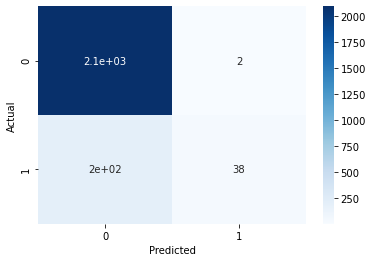

In [98]:
sns.heatmap((metrics.confusion_matrix(df_train['default'],y_class_pred)),annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
            

In [110]:
# Choosing optimal threshold
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(df_train['default'],y_prob_pred_train)

In [111]:
optimal_idx=np.argmax(tpr-fpr)
optimal_threshold=thresholds[optimal_idx]
optimal_threshold

0.19652416206085271

In [112]:
# Vlidating model on train set
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.19:
        a=1
    else:
        a=0
    y_class_pred.append(a)

Text(33.0, 0.5, 'Actual')

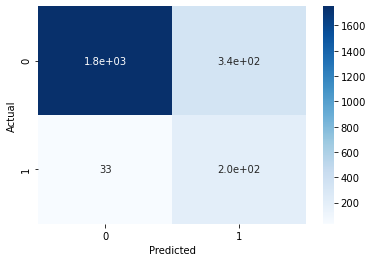

In [102]:
sns.heatmap((metrics.confusion_matrix(df_train['default'],y_class_pred)),annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [103]:
print(metrics.classification_report(df_train['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.981     0.837     0.903      2092
           1      0.375     0.861     0.522       238

    accuracy                          0.839      2330
   macro avg      0.678     0.849     0.713      2330
weighted avg      0.920     0.839     0.864      2330



In [104]:
y_prob_pred_test=model_3.predict(df_test)

In [113]:
# Validating model on test set
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.19:
        a=1
    else:
        a=0
    y_class_pred.append(a)


Text(33.0, 0.5, 'Actual')

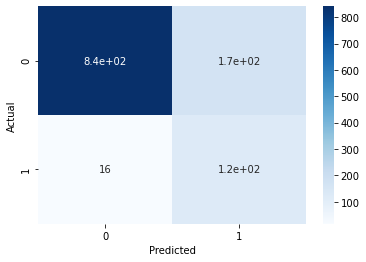

In [114]:
sns.heatmap((metrics.confusion_matrix(df_test['default'],y_class_pred)),annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [115]:
print(metrics.classification_report(df_test['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.981     0.833     0.901      1009
           1      0.423     0.885     0.572       139

    accuracy                          0.840      1148
   macro avg      0.702     0.859     0.737      1148
weighted avg      0.914     0.840     0.862      1148

